<a href="https://colab.research.google.com/github/arcane-ss/Python-Assignment-RevoU-Aug22/blob/main/W6W7W8_Anandia_Hapsari_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **W6W7W8 Intermediate Assignment**
**Anandia Rani H. - Amsterdam - Team 2**

# **Milestone 1**

Clean datasets and explore the datasets to get user segmentation insights.

Datasets used in this colab:

*   user.csv (https://drive.google.com/file/d/11PIWh0ksBPsnC6Hm-idkid0nPUfMkeEf/view?usp=sharing)
*   daily_user_balance_sep21.csv (https://drive.google.com/file/d/1uq_iZE0fWIp8qdDa-AC9OXx3BlgzTir3/view?usp=sharing)

## **1. Import library**



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

## **2. Import datasets**

### 2.1 Import dataset user as df1

**Data Dictionary - User Dataset**

*   user_id = Client ID on the platform
*   registration_import_datetime = Registration time and date at UTC+7 timezone (WIB)
*   user_gender =	User self-identified gender
*   user_age = User self-identified age
*   user_occupation =	User self-identified job
*   user_income_range =	User self-identified income range
*   referral_code_used =	If user enter referral code during registration, the value is "used referral"; else will be Null valued
*   user_income_source = User self-declared source of income

In [2]:
user_url = 'https://drive.google.com/file/d/11PIWh0ksBPsnC6Hm-idkid0nPUfMkeEf/view?usp=sharing'
user = 'https://drive.google.com/uc?id='+ user_url.split('/')[-2]
df1 = pd.read_csv(user)
df1

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,NaN,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,NaN,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,NaN,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,NaN,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,NaN,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,NaN,Gaji


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


- There are 14,711 rows and 7 columns in dataset df1.
- 6 columns type as object. We need to convert into proper data type.


### 2.2 Import dataset daily_user_balance_sep21.csv as df2

**Data Dictionary - Daily User Balance Sep 2021 dataset**

*   user_id =	Client ID on the platform
*   date =	Date of the user balance
*   Saham_AUM =	AUM of equity mutual fund held by client to date
*   Saham_invested_amount =	The total price paid by client to buy equity mutual fund to date
*   Saham_transaction_amount =	Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   Pasar_Uang_AUM =	AUM of money market mutual fund held by client to date
*   Pasar_Uang_invested_amount =	The total price paid by client to buy money market mutual fund to date
*   Pasar_Uang_transaction_amount =	Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   Pendapatan_Tetap_AUM =	AUM of fixed income mutual fund held by client to date
*   Pendapatan_Tetap_invested_amount =	The total price paid by client to buy fixed income mutual fund to date
*   Pendapatan_Tetap_transaction_amount =	Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
*   Campuran_AUM =	AUM of mixed mutual fund held by client to date
*   Campuran_invested_amount =	The total price paid by client to buy mixed mutual fund to date
*   Campuran_transaction_amount =	Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA

In [4]:
userbal_url = 'https://drive.google.com/file/d/1uq_iZE0fWIp8qdDa-AC9OXx3BlgzTir3/view?usp=sharing'
userbal = 'https://drive.google.com/uc?id='+ userbal_url.split('/')[-2]
df2 = pd.read_csv(userbal)
df2

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

There are 158,810 rows and 13 columns in df2.

## **3. Clean user data (df1)**

1.   Find mising values
2.   Find duplicated values in 'user id'
3.   Check for typos
4.   Time series manipulation: convert registration_import_datetime as datetime type
5.   Check for category data distribution


### 3.1 Find missing values in df1

In [6]:
df1.isna()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
14707,False,False,False,False,False,False,True,False
14708,False,False,False,False,False,False,True,False
14709,False,False,False,False,False,False,True,False
14710,False,False,False,False,False,False,True,False


In [7]:
df1.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
dtype: int64

There are 9,108 missing values in referral_code_used.

3.1.1 Replacing missing values in referral_code_used with 0.

Rationale: We were thinking to use this column as one of our segmentation, so we would like to encode referral_code_used.

In [8]:
df1.fillna('did not use', inplace=True)

In [9]:
df1

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 500 Juta - 1 Miliar,did not use,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,did not use,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,did not use,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,PNS,> Rp 500 Juta - 1 Miliar,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta - 500 Juta,did not use,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta - 500 Juta,did not use,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta - 500 Juta,did not use,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta - 500 Juta,did not use,Gaji


### 3.2 Find duplicated values and remove them if any

In [10]:
df1[df1['user_id'].duplicated()] # To check for duplicates in user_id

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source


No duplicate user_id found.

### 3.3 Check for typos in user_gender, user_occupation and user_income_range

In [11]:
df1['user_gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df1['user_occupation'].unique()

array(['Swasta', 'Others', 'IRT', 'PNS', 'Pengusaha', 'Pensiunan',
       'TNI/Polisi', 'Guru', 'Pelajar'], dtype=object)

In [13]:
df1['user_income_range'].unique()

array(['> Rp 500 Juta - 1 Miliar', '> Rp 50 Juta - 100 Juta',
       'Rp 10 Juta - 50 Juta', '< 10 Juta', '> Rp 100 Juta - 500 Juta',
       '> Rp 1 Miliar'], dtype=object)

No typos in those columns.

### 3.3 Time series manipulation: registration_import_datetime as datetime

registration_import_datetime is still as object, therefore we need to convert itu date type.

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            14712 non-null  object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


In [15]:
df1['registration_import_datetime']

0        2021-09-17 14:10:44
1        2021-10-09 11:11:34
2        2021-10-08 01:27:30
3        2021-08-12 07:19:32
4        2021-08-15 09:31:24
                ...         
14707    2021-10-17 15:57:23
14708    2021-10-15 12:44:05
14709    2021-10-11 10:06:15
14710    2021-10-21 13:42:20
14711    2021-10-22 00:55:26
Name: registration_import_datetime, Length: 14712, dtype: object

In [16]:
df1['registration_import_datetime'] = pd.to_datetime(df1['registration_import_datetime'])

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 919.6+ KB


registration_import_datetime has been formatted as date.

### 3.4 String manipulation: convert user_id as string.

In [18]:
df1['user_id'] = df1['user_id'].astype(str)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  object        
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            14712 non-null  object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 919.6+ KB


### 3.5 Check for category data distribution

User occupation distribution:

In [20]:
df1['user_occupation'].value_counts()

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

Group PNS, Guru, TNI/Polisi, Pensiunan as Others because the total number is small compare to others.

In [21]:
df1.loc[df1['user_occupation'] == 'PNS', 'user_occupation'] = 'Others'
df1.loc[df1['user_occupation'] == 'Guru', 'user_occupation'] = 'Others'
df1.loc[df1['user_occupation'] == 'TNI/Polisi', 'user_occupation'] = 'Others'
df1.loc[df1['user_occupation'] == 'Pensiunan', 'user_occupation'] = 'Others'

In [22]:
df1['user_occupation'].value_counts()

Pelajar      7887
Swasta       3263
Others       2030
IRT           934
Pengusaha     598
Name: user_occupation, dtype: int64

User income range distribution:

In [23]:
df1['user_income_range'].value_counts()

< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

Group income range above Rp 100 million in one group as "> Rp 100 Juta" because the total number is also small compare to others.

In [24]:
df1.loc[df1['user_income_range'] == '> Rp 100 Juta - 500 Juta', 'user_income_range'] = '> Rp 100 Juta'
df1.loc[df1['user_income_range'] == '> Rp 500 Juta - 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'
df1.loc[df1['user_income_range'] == '> Rp 1 Miliar', 'user_income_range'] = '> Rp 100 Juta'

In [25]:
df1['user_income_range'].value_counts()

< 10 Juta                  6275
Rp 10 Juta - 50 Juta       4816
> Rp 50 Juta - 100 Juta    2390
> Rp 100 Juta              1231
Name: user_income_range, dtype: int64

## **3. Clean daily_user_balance_sep21 (df2)**


1.   Time series manipulation: convert column 'date' as datetime type.
2.   Handling NA values: replacing NA values with 0.
3.   Converting float64 data types into int64.
4.   Converting user_id to string data type.



In [26]:
df2

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


### 3.1 Time series manipulation: date as datetime

date is still as object, so we need to convert it into date type.

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 

In [28]:
df2['date']

0         2021-08-30
1         2021-08-31
2         2021-09-01
3         2021-09-02
4         2021-09-03
             ...    
158806    2021-09-30
158807    2021-09-30
158808    2021-09-30
158809    2021-09-30
158810    2021-09-30
Name: date, Length: 158811, dtype: object

In [29]:
df2['date'] = pd.to_datetime(df2['date'])
df2

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

In [31]:
df2

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


date has been formatted as date.

### 3.2 Handling NA values

In [32]:
df2_na = df2.copy()
df2_na

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10132277.0,10000000.0,NaN
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206945.0,10000000.0,0.0
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.0,10000000.0,0.0
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.0,10000000.0,0.0
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158807,4165132,2021-09-30,NaN,NaN,NaN,10001.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158808,4165630,2021-09-30,41625.0,40000.0,NaN,10001.0,10000.0,NaN,49869.0,50000.0,NaN,NaN,NaN,NaN
158809,4165704,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,9987.0,10000.0,NaN,NaN,NaN,NaN


In [33]:
df2_na.isna()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,False,False,True,True,True,True,True,True,True,True,True,False,False,True
1,False,False,True,True,True,True,True,True,True,True,True,False,False,False
2,False,False,True,True,True,True,True,True,True,True,True,False,False,False
3,False,False,True,True,True,True,True,True,True,True,True,False,False,False
4,False,False,True,True,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,False,False,True,True,True,False,False,True,True,True,True,True,True,True
158807,False,False,True,True,True,False,False,True,True,True,True,True,True,True
158808,False,False,False,False,True,False,False,True,False,False,True,True,True,True
158809,False,False,True,True,True,True,True,True,False,False,True,True,True,True


In [34]:
df2_na.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

#### Replacing NA values with 0.

NaN means zero balance or no transaction at that date.

In [35]:
df2_na.fillna(0, inplace=True)

In [36]:
df2_na

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
0,50701,2021-08-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10132277.0,10000000.0,0.0
1,50701,2021-08-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10206945.0,10000000.0,0.0
2,50701,2021-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9956556.0,10000000.0,0.0
3,50701,2021-09-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9914858.0,10000000.0,0.0
4,50701,2021-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10016360.0,10000000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158807,4165132,2021-09-30,0.0,0.0,0.0,10001.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158808,4165630,2021-09-30,41625.0,40000.0,0.0,10001.0,10000.0,0.0,49869.0,50000.0,0.0,0.0,0.0,0.0
158809,4165704,2021-09-30,0.0,0.0,0.0,0.0,0.0,0.0,9987.0,10000.0,0.0,0.0,0.0,0.0


In [37]:
df2_na.isna().sum()

user_id                                0
date                                   0
Saham_AUM                              0
Saham_invested_amount                  0
Saham_transaction_amount               0
Pasar_Uang_AUM                         0
Pasar_Uang_invested_amount             0
Pasar_Uang_transaction_amount          0
Pendapatan_Tetap_AUM                   0
Pendapatan_Tetap_invested_amount       0
Pendapatan_Tetap_transaction_amount    0
Campuran_AUM                           0
Campuran_invested_amount               0
Campuran_transaction_amount            0
dtype: int64

No NA values left.

### 3.3 Converting float64 data types into int64.

In [38]:
df2_na = df2_na.astype(dict.fromkeys(df2_na.columns[2:14], int))
df2_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  int64         
 3   Saham_invested_amount                158811 non-null  int64         
 4   Saham_transaction_amount             158811 non-null  int64         
 5   Pasar_Uang_AUM                       158811 non-null  int64         
 6   Pasar_Uang_invested_amount           158811 non-null  int64         
 7   Pasar_Uang_transaction_amount        158811 non-null  int64         
 8   Pendapatan_Tetap_AUM                 158811 non-null  int64         
 9   Pendapatan_Tetap_invested_amount     158811 non-null  int64         
 

### 3.4 Converting user_id to string.

In [39]:
df2_na['user_id'] = df2_na['user_id'].astype(str)
df2_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  int64         
 3   Saham_invested_amount                158811 non-null  int64         
 4   Saham_transaction_amount             158811 non-null  int64         
 5   Pasar_Uang_AUM                       158811 non-null  int64         
 6   Pasar_Uang_invested_amount           158811 non-null  int64         
 7   Pasar_Uang_transaction_amount        158811 non-null  int64         
 8   Pendapatan_Tetap_AUM                 158811 non-null  int64         
 9   Pendapatan_Tetap_invested_amount     158811 non-null  int64         
 

## **4. Calculate Profit of Each Products in df2**

We are going to calculate the profit of each products (Saham, Pasar Uang, Pendapatan Tetap, Campuran).

*   Profit = AUM - Invested

We need to make new columns for profit of each products:
*   Saham_profit = Saham_AUM - Saham_invested_amount
*   PasarUang_profit = Pasar_Uang_AUM - Pasar_Uang_Invested_amount
*   FixedInc_profit = Pendapatan_Tetap_AUM - Pendapatan_Tetap_Invested_amount
*   Campuran_profit = Campuran_AUM - Campuran_Invested_amount

In [40]:
# Calculate profit for Saham, Pasar Uang, Pendapatan Tetap & Campuran
df2_p = df2_na.copy()
df2_p.loc[:,'Saham_profit'] = df2_p['Saham_AUM'] - df2_p['Saham_invested_amount']
df2_p.loc[:,'PasarUang_profit'] = df2_p['Pasar_Uang_AUM'] - df2_p['Pasar_Uang_invested_amount']
df2_p.loc[:,'FixedIncome_profit'] = df2_p['Pendapatan_Tetap_AUM'] - df2_p['Pendapatan_Tetap_invested_amount']
df2_p.loc[:,'Campuran_profit'] = df2_p['Campuran_AUM'] - df2_p['Campuran_invested_amount']
df2_p

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Campuran_profit
0,50701,2021-08-30,0,0,0,0,0,0,0,0,0,10132277,10000000,0,0,0,0,132277
1,50701,2021-08-31,0,0,0,0,0,0,0,0,0,10206945,10000000,0,0,0,0,206945
2,50701,2021-09-01,0,0,0,0,0,0,0,0,0,9956556,10000000,0,0,0,0,-43444
3,50701,2021-09-02,0,0,0,0,0,0,0,0,0,9914858,10000000,0,0,0,0,-85142
4,50701,2021-09-03,0,0,0,0,0,0,0,0,0,10016360,10000000,0,0,0,0,16360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,0,0,0,10001,10000,0,0,0,0,0,0,0,0,1,0,0
158808,4165630,2021-09-30,41625,40000,0,10001,10000,0,49869,50000,0,0,0,0,1625,1,-131,0
158809,4165704,2021-09-30,0,0,0,0,0,0,9987,10000,0,0,0,0,0,0,-13,0


In [41]:
df2_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  int64         
 3   Saham_invested_amount                158811 non-null  int64         
 4   Saham_transaction_amount             158811 non-null  int64         
 5   Pasar_Uang_AUM                       158811 non-null  int64         
 6   Pasar_Uang_invested_amount           158811 non-null  int64         
 7   Pasar_Uang_transaction_amount        158811 non-null  int64         
 8   Pendapatan_Tetap_AUM                 158811 non-null  int64         
 9   Pendapatan_Tetap_invested_amount     158811 non-null  int64         
 

## **5. Total Transactions per User per Month (Net Buy - Sell)**

Calculate total transaction (net buy - sell) for each user per day.

In [42]:
df2_a = df2_p.copy()

In [43]:
df2_a['Month'] = df2_a['date'].dt.month_name()
df2_a

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Campuran_profit,Month
0,50701,2021-08-30,0,0,0,0,0,0,0,0,0,10132277,10000000,0,0,0,0,132277,August
1,50701,2021-08-31,0,0,0,0,0,0,0,0,0,10206945,10000000,0,0,0,0,206945,August
2,50701,2021-09-01,0,0,0,0,0,0,0,0,0,9956556,10000000,0,0,0,0,-43444,September
3,50701,2021-09-02,0,0,0,0,0,0,0,0,0,9914858,10000000,0,0,0,0,-85142,September
4,50701,2021-09-03,0,0,0,0,0,0,0,0,0,10016360,10000000,0,0,0,0,16360,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,September
158807,4165132,2021-09-30,0,0,0,10001,10000,0,0,0,0,0,0,0,0,1,0,0,September
158808,4165630,2021-09-30,41625,40000,0,10001,10000,0,49869,50000,0,0,0,0,1625,1,-131,0,September
158809,4165704,2021-09-30,0,0,0,0,0,0,9987,10000,0,0,0,0,0,0,-13,0,September


### 5.1 Making Total Buy columns

Where transaction amount is above 0.

In [44]:
df2_a.loc[:,'Saham_Buy'] = np.where(df2_a['Saham_transaction_amount'] > 0, df2_a['Saham_transaction_amount'], 0)
df2_a.loc[:,'PasarUang_Buy'] = np.where(df2_a['Pasar_Uang_transaction_amount'] > 0, df2_a['Pasar_Uang_transaction_amount'], 0)
df2_a.loc[:,'FixedInc_Buy'] = np.where(df2_a['Pendapatan_Tetap_transaction_amount'] > 0, df2_a['Pendapatan_Tetap_transaction_amount'], 0)
df2_a.loc[:,'Mixed_Buy'] = np.where(df2_a['Campuran_transaction_amount'] > 0, df2_a['Campuran_transaction_amount'], 0)
df2_a

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_transaction_amount,Saham_profit,PasarUang_profit,FixedIncome_profit,Campuran_profit,Month,Saham_Buy,PasarUang_Buy,FixedInc_Buy,Mixed_Buy
0,50701,2021-08-30,0,0,0,0,0,0,0,0,...,0,0,0,0,132277,August,0,0,0,0
1,50701,2021-08-31,0,0,0,0,0,0,0,0,...,0,0,0,0,206945,August,0,0,0,0
2,50701,2021-09-01,0,0,0,0,0,0,0,0,...,0,0,0,0,-43444,September,0,0,0,0
3,50701,2021-09-02,0,0,0,0,0,0,0,0,...,0,0,0,0,-85142,September,0,0,0,0
4,50701,2021-09-03,0,0,0,0,0,0,0,0,...,0,0,0,0,16360,September,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,September,0,0,0,0
158807,4165132,2021-09-30,0,0,0,10001,10000,0,0,0,...,0,0,1,0,0,September,0,0,0,0
158808,4165630,2021-09-30,41625,40000,0,10001,10000,0,49869,50000,...,0,1625,1,-131,0,September,0,0,0,0
158809,4165704,2021-09-30,0,0,0,0,0,0,9987,10000,...,0,0,0,-13,0,September,0,0,0,0


### 5.3 Making Total Sell columns

Where transaction amount below 0.

In [45]:
df2_a.loc[:,'Saham_Sell'] = np.where(df2_a['Saham_transaction_amount'] < 0, df2_a['Saham_transaction_amount'], 0)
df2_a.loc[:,'PasarUang_Sell'] = np.where(df2_a['Pasar_Uang_transaction_amount'] < 0, df2_a['Pasar_Uang_transaction_amount'], 0)
df2_a.loc[:,'FixedInc_Sell'] = np.where(df2_a['Pendapatan_Tetap_transaction_amount'] < 0, df2_a['Pendapatan_Tetap_transaction_amount'], 0)
df2_a.loc[:,'Mixed_Sell'] = np.where(df2_a['Campuran_transaction_amount'] < 0, df2_a['Campuran_transaction_amount'], 0)
df2_a

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_profit,Month,Saham_Buy,PasarUang_Buy,FixedInc_Buy,Mixed_Buy,Saham_Sell,PasarUang_Sell,FixedInc_Sell,Mixed_Sell
0,50701,2021-08-30,0,0,0,0,0,0,0,0,...,132277,August,0,0,0,0,0,0,0,0
1,50701,2021-08-31,0,0,0,0,0,0,0,0,...,206945,August,0,0,0,0,0,0,0,0
2,50701,2021-09-01,0,0,0,0,0,0,0,0,...,-43444,September,0,0,0,0,0,0,0,0
3,50701,2021-09-02,0,0,0,0,0,0,0,0,...,-85142,September,0,0,0,0,0,0,0,0
4,50701,2021-09-03,0,0,0,0,0,0,0,0,...,16360,September,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,...,0,September,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,0,0,0,10001,10000,0,0,0,...,0,September,0,0,0,0,0,0,0,0
158808,4165630,2021-09-30,41625,40000,0,10001,10000,0,49869,50000,...,0,September,0,0,0,0,0,0,0,0
158809,4165704,2021-09-30,0,0,0,0,0,0,9987,10000,...,0,September,0,0,0,0,0,0,0,0


### 5.2 Calculate Total Net Transaction per User per Month

Net transaction = Buy amount + Sell amount (because Sell is indicated by negative amount)

In [46]:
df2_a.loc[:,'Saham_Total_Trx'] = df2_a.groupby(['user_id','Month'])['Saham_transaction_amount'].cumsum()
df2_a.loc[:,'PasarUang_Total_Trx'] = df2_a.groupby(['user_id','Month'])['Pasar_Uang_transaction_amount'].cumsum()
df2_a.loc[:,'FixedInc_Total_Trx'] = df2_a.groupby(['user_id','Month'])['Pendapatan_Tetap_transaction_amount'].cumsum()
df2_a.loc[:,'Campuran_Total_Trx'] = df2_a.groupby(['user_id','Month'])['Campuran_transaction_amount'].cumsum()
df2_a

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,FixedInc_Buy,Mixed_Buy,Saham_Sell,PasarUang_Sell,FixedInc_Sell,Mixed_Sell,Saham_Total_Trx,PasarUang_Total_Trx,FixedInc_Total_Trx,Campuran_Total_Trx
0,50701,2021-08-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50701,2021-08-31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50701,2021-09-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50701,2021-09-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50701,2021-09-03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,0,0,0,10001,10000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158808,4165630,2021-09-30,41625,40000,0,10001,10000,0,49869,50000,...,0,0,0,0,0,0,0,0,0,0
158809,4165704,2021-09-30,0,0,0,0,0,0,9987,10000,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df2_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 31 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  int64         
 3   Saham_invested_amount                158811 non-null  int64         
 4   Saham_transaction_amount             158811 non-null  int64         
 5   Pasar_Uang_AUM                       158811 non-null  int64         
 6   Pasar_Uang_invested_amount           158811 non-null  int64         
 7   Pasar_Uang_transaction_amount        158811 non-null  int64         
 8   Pendapatan_Tetap_AUM                 158811 non-null  int64         
 9   Pendapatan_Tetap_invested_amount     158811 non-null  int64         
 

## **6. Transaction Count**

In [48]:
df2_a.loc[:,'Saham_Count'] = np.where((df2_a['Saham_transaction_amount'] > 0) | (df2_a['Saham_transaction_amount'] < 0), 1, 0)
df2_a.loc[:,'PasarUang_Count'] = np.where((df2_a['Pasar_Uang_transaction_amount'] > 0) | (df2_a['Pasar_Uang_transaction_amount'] < 0), 1, 0)
df2_a.loc[:,'FixedIncome_Count'] = np.where((df2_a['Pendapatan_Tetap_transaction_amount'] > 0) | (df2_a['Pendapatan_Tetap_transaction_amount'] < 0), 1, 0)
df2_a.loc[:,'Mixed_Count'] = np.where((df2_a['Campuran_transaction_amount'] > 0) | (df2_a['Campuran_transaction_amount'] < 0), 1, 0)
df2_a

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,FixedInc_Sell,Mixed_Sell,Saham_Total_Trx,PasarUang_Total_Trx,FixedInc_Total_Trx,Campuran_Total_Trx,Saham_Count,PasarUang_Count,FixedIncome_Count,Mixed_Count
0,50701,2021-08-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50701,2021-08-31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50701,2021-09-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50701,2021-09-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50701,2021-09-03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,0,0,0,10001,10000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158808,4165630,2021-09-30,41625,40000,0,10001,10000,0,49869,50000,...,0,0,0,0,0,0,0,0,0,0
158809,4165704,2021-09-30,0,0,0,0,0,0,9987,10000,...,0,0,0,0,0,0,0,0,0,0


Make new columns for Total Transactions Count per User per Month:

In [49]:
df2_a.loc[:,'Saham_Total_Count'] = df2_a.groupby(['user_id','Month'])['Saham_Count'].cumsum()
df2_a.loc[:,'PasarUang_Total_Count'] = df2_a.groupby(['user_id','Month'])['PasarUang_Count'].cumsum()
df2_a.loc[:,'FixedInc_Total_Count'] = df2_a.groupby(['user_id','Month'])['FixedIncome_Count'].cumsum()
df2_a.loc[:,'Mixed_Total_Count'] = df2_a.groupby(['user_id','Month'])['Mixed_Count'].cumsum()
df2_a

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,FixedInc_Total_Trx,Campuran_Total_Trx,Saham_Count,PasarUang_Count,FixedIncome_Count,Mixed_Count,Saham_Total_Count,PasarUang_Total_Count,FixedInc_Total_Count,Mixed_Total_Count
0,50701,2021-08-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50701,2021-08-31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50701,2021-09-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,50701,2021-09-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50701,2021-09-03,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,0,0,0,10001,10000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158808,4165630,2021-09-30,41625,40000,0,10001,10000,0,49869,50000,...,0,0,0,0,0,0,0,0,0,0
158809,4165704,2021-09-30,0,0,0,0,0,0,9987,10000,...,0,0,0,0,0,0,0,0,0,0


## **6. Filtering data in df2** 

Only select data 31 August 2021 and 30 September 2021 to get the cumulated amount at the end of August and September




In [50]:
df2_clean = df2_a.copy()

In [51]:
df2_clean = df2_clean.loc[(df2_clean['date'] == '2021-08-31') | (df2_clean['date'] == '2021-09-30')] # Select only data in 31 August 2021 or 30 September 2021.
df2_clean

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,FixedInc_Total_Trx,Campuran_Total_Trx,Saham_Count,PasarUang_Count,FixedIncome_Count,Mixed_Count,Saham_Total_Count,PasarUang_Total_Count,FixedInc_Total_Count,Mixed_Total_Count
1,50701,2021-08-31,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,50701,2021-09-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,50961,2021-08-31,716057,700000,0,100049,100000,0,200117,200000,...,0,0,0,0,0,0,0,0,0,0
46,50961,2021-09-30,2063909,2000000,300000,700603,700000,600000,1398998,1400000,...,1200000,0,1,1,1,0,2,1,1,0
52,53759,2021-08-31,70839,70000,0,10006,10000,0,20066,20000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,0,0,0,10001,10000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158808,4165630,2021-09-30,41625,40000,0,10001,10000,0,49869,50000,...,0,0,0,0,0,0,0,0,0,0
158809,4165704,2021-09-30,0,0,0,0,0,0,9987,10000,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df2_clean['date'].unique()

array(['2021-08-31T00:00:00.000000000', '2021-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

Now there are left only data cumulated amount at the end of August and September.

## **7. Dropping unnecessary columns from df2**

We want to drop transaction_amount columns because those are no longer irrelevant for our next analysis.

But, we are going to use transaction_amount columns in EDA to look for daily trends in each products.

In [53]:
df2_drop = df2_clean.copy()

In [54]:
df2_drop = df2_drop.drop(['Saham_transaction_amount', 'Pasar_Uang_transaction_amount', 'Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'], axis=1)

In [55]:
df2_drop

,user_id,date,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,...,FixedInc_Total_Trx,Campuran_Total_Trx,Saham_Count,PasarUang_Count,FixedIncome_Count,Mixed_Count,Saham_Total_Count,PasarUang_Total_Count,FixedInc_Total_Count,Mixed_Total_Count
1,50701,2021-08-31,0,0,0,0,0,0,10206945,10000000,...,0,0,0,0,0,0,0,0,0,0
23,50701,2021-09-30,0,0,0,0,0,0,9943587,10000000,...,0,0,0,0,0,0,0,0,0,0
24,50961,2021-08-31,716057,700000,100049,100000,200117,200000,0,0,...,0,0,0,0,0,0,0,0,0,0
46,50961,2021-09-30,2063909,2000000,700603,700000,1398998,1400000,0,0,...,1200000,0,1,1,1,0,2,1,1,0
52,53759,2021-08-31,70839,70000,10006,10000,20066,20000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,0,0,10001,10000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158808,4165630,2021-09-30,41625,40000,10001,10000,49869,50000,0,0,...,0,0,0,0,0,0,0,0,0,0
158809,4165704,2021-09-30,0,0,0,0,9987,10000,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df2_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11352 entries, 1 to 158810
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           11352 non-null  object        
 1   date                              11352 non-null  datetime64[ns]
 2   Saham_AUM                         11352 non-null  int64         
 3   Saham_invested_amount             11352 non-null  int64         
 4   Pasar_Uang_AUM                    11352 non-null  int64         
 5   Pasar_Uang_invested_amount        11352 non-null  int64         
 6   Pendapatan_Tetap_AUM              11352 non-null  int64         
 7   Pendapatan_Tetap_invested_amount  11352 non-null  int64         
 8   Campuran_AUM                      11352 non-null  int64         
 9   Campuran_invested_amount          11352 non-null  int64         
 10  Saham_profit                      11352 non-n

## **8. Check for outliers in df2**



1.   Making separate dataframe for each products (Saham, Pasar Uang, Pendapatan Tetap, Campuran)
2.   Removing rows with zero values in AUM.
3.   Boxplotting.
4.   Calculate IQR to find outliers value.
5.   Removing outliers.



Before checking outliers using boxplot, we have to convert column 3:12 to integer.

First, we are going to try converting Saham_AUM.

### 7.1 Making separate dataframe for each products

7.1.1 First, we are going to make Saham dataframe as df2_saham.

In [57]:
df2_saham = df2_drop[['user_id','date','Saham_AUM','Saham_invested_amount','Saham_profit','Saham_Total_Trx','Saham_Buy','Saham_Sell','Saham_Count','Saham_Total_Count']].copy()
df2_saham

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit,Saham_Total_Trx,Saham_Buy,Saham_Sell,Saham_Count,Saham_Total_Count
1,50701,2021-08-31,0,0,0,0,0,0,0,0
23,50701,2021-09-30,0,0,0,0,0,0,0,0
24,50961,2021-08-31,716057,700000,16057,0,0,0,0,0
46,50961,2021-09-30,2063909,2000000,63909,1300000,300000,0,1,2
52,53759,2021-08-31,70839,70000,839,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,0,0,0,0,0,0,0,0
158808,4165630,2021-09-30,41625,40000,1625,0,0,0,0,0
158809,4165704,2021-09-30,0,0,0,0,0,0,0,0


7.1.2 Then we are going to remove zero values.

In [58]:
df2_saham = df2_saham.loc[(df2_saham['Saham_AUM'] != 0)]
df2_saham

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit,Saham_Total_Trx,Saham_Buy,Saham_Sell,Saham_Count,Saham_Total_Count
24,50961,2021-08-31,716057,700000,16057,0,0,0,0,0
46,50961,2021-09-30,2063909,2000000,63909,1300000,300000,0,1,2
52,53759,2021-08-31,70839,70000,839,0,0,0,0,0
74,53759,2021-09-30,73179,70000,3179,0,0,0,0,0
155,66145,2021-09-30,249327,240000,9327,140000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
158799,4163940,2021-09-30,102688,100000,2688,0,0,0,0,0
158800,4164264,2021-09-30,10406,10000,406,0,0,0,0,0
158801,4164349,2021-09-30,10406,10000,406,0,0,0,0,0
158803,4164737,2021-09-30,10195,10000,195,0,0,0,0,0


### 7.2 Then, we are going to make boxplot from df2_saham to check for outliers.

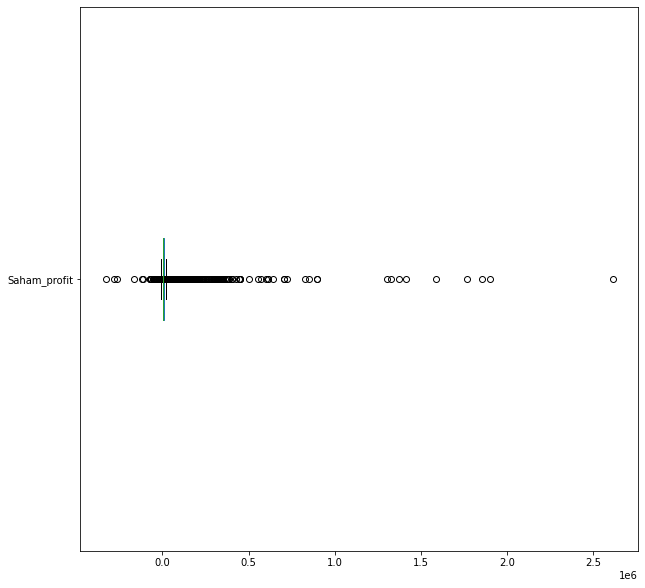

In [59]:
df2_saham.boxplot(column=['Saham_profit'], fontsize=10, rot=0, grid=False, figsize=(10,10), vert=False)

In [60]:
# Calculate quartile 1 and 3
Q1 = df2_saham['Saham_profit'].quantile(0.25)
Q3 = df2_saham['Saham_profit'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 918.0

Q3:
 7649.0

IQR:
 6731.0

Min:
 -9178.5

Max:
 17745.5


In [61]:
# Filtering max & min values
saham_min = df2_saham['Saham_profit']<boxplot_min
saham_max = df2_saham['Saham_profit']>boxplot_max

df2_s_clean = df2_saham[~
    (saham_min | saham_max)
    ]

df2_s_clean

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit,Saham_Total_Trx,Saham_Buy,Saham_Sell,Saham_Count,Saham_Total_Count
24,50961,2021-08-31,716057,700000,16057,0,0,0,0,0
52,53759,2021-08-31,70839,70000,839,0,0,0,0,0
74,53759,2021-09-30,73179,70000,3179,0,0,0,0,0
155,66145,2021-09-30,249327,240000,9327,140000,0,0,0,1
174,67251,2021-09-30,584731,570000,14731,530000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
158799,4163940,2021-09-30,102688,100000,2688,0,0,0,0,0
158800,4164264,2021-09-30,10406,10000,406,0,0,0,0,0
158801,4164349,2021-09-30,10406,10000,406,0,0,0,0,0
158803,4164737,2021-09-30,10195,10000,195,0,0,0,0,0


In df2_s_clean, remains 4,904 rows after we remove outliers.

### 7.3 Now we are going to do the same steps for other products.

1.   Make separate dataframes (PasarUang, Pendapatan_Tetap, Campuran)
2.   Make boxplots from each dataframes
3.   Calculate IQR.
4.   Remove outliers.


7.3.1 Pasar Uang dataframe

In [62]:
# Make dataframe for Pasar Uang product
df2_PasarUang = df2_drop[['user_id','date','Pasar_Uang_AUM','Pasar_Uang_invested_amount','PasarUang_profit','PasarUang_Total_Trx','PasarUang_Buy','PasarUang_Sell','PasarUang_Count','PasarUang_Total_Count']].copy()
df2_PasarUang

,user_id,date,Pasar_Uang_AUM,Pasar_Uang_invested_amount,PasarUang_profit,PasarUang_Total_Trx,PasarUang_Buy,PasarUang_Sell,PasarUang_Count,PasarUang_Total_Count
1,50701,2021-08-31,0,0,0,0,0,0,0,0
23,50701,2021-09-30,0,0,0,0,0,0,0,0
24,50961,2021-08-31,100049,100000,49,0,0,0,0,0
46,50961,2021-09-30,700603,700000,603,600000,600000,0,1,1
52,53759,2021-08-31,10006,10000,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,10001,10000,1,0,0,0,0,0
158808,4165630,2021-09-30,10001,10000,1,0,0,0,0,0
158809,4165704,2021-09-30,0,0,0,0,0,0,0,0


In [63]:
# Removing rows with zero values
df2_PasarUang = df2_PasarUang.loc[(df2_PasarUang['Pasar_Uang_AUM'] != 0)]
df2_PasarUang

,user_id,date,Pasar_Uang_AUM,Pasar_Uang_invested_amount,PasarUang_profit,PasarUang_Total_Trx,PasarUang_Buy,PasarUang_Sell,PasarUang_Count,PasarUang_Total_Count
24,50961,2021-08-31,100049,100000,49,0,0,0,0,0
46,50961,2021-09-30,700603,700000,603,600000,600000,0,1,1
52,53759,2021-08-31,10006,10000,6,0,0,0,0,0
74,53759,2021-09-30,10027,10000,27,0,0,0,0,0
77,54759,2021-08-31,10007875,10000000,7875,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
158803,4164737,2021-09-30,130034,130000,34,0,0,0,0,0
158804,4164893,2021-09-30,10001,10000,1,0,0,0,0,0
158807,4165132,2021-09-30,10001,10000,1,0,0,0,0,0
158808,4165630,2021-09-30,10001,10000,1,0,0,0,0,0


There are 7,043 rows in Pasar Uang dataframe.

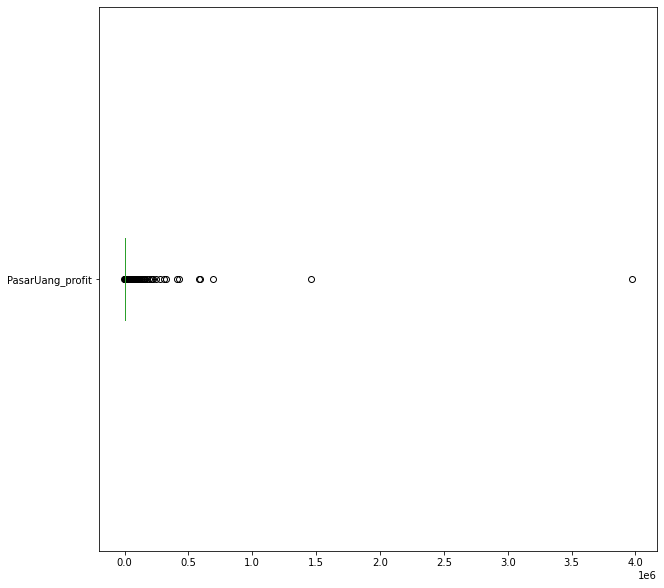

In [64]:
# Boxplotting Pasar Uang dataframe
df2_PasarUang.boxplot(column=['PasarUang_profit'], fontsize=10, rot=0, grid=False, figsize=(10,10), vert=False)

In [65]:
# Calculate quartile 1 and 3
Q1 = df2_PasarUang['PasarUang_profit'].quantile(0.25)
Q3 = df2_PasarUang['PasarUang_profit'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 18.0

Q3:
 388.0

IQR:
 370.0

Min:
 -537.0

Max:
 943.0


In [66]:
# Filtering max & min values
PasarUang_min = df2_PasarUang['PasarUang_profit']<boxplot_min
PasarUang_max = df2_PasarUang['PasarUang_profit']>boxplot_max

df2_pu_clean = df2_PasarUang[~
    (PasarUang_min | PasarUang_max)
    ]

df2_pu_clean

,user_id,date,Pasar_Uang_AUM,Pasar_Uang_invested_amount,PasarUang_profit,PasarUang_Total_Trx,PasarUang_Buy,PasarUang_Sell,PasarUang_Count,PasarUang_Total_Count
24,50961,2021-08-31,100049,100000,49,0,0,0,0,0
46,50961,2021-09-30,700603,700000,603,600000,600000,0,1,1
52,53759,2021-08-31,10006,10000,6,0,0,0,0,0
74,53759,2021-09-30,10027,10000,27,0,0,0,0,0
155,66145,2021-09-30,29992,30000,-8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
158803,4164737,2021-09-30,130034,130000,34,0,0,0,0,0
158804,4164893,2021-09-30,10001,10000,1,0,0,0,0,0
158807,4165132,2021-09-30,10001,10000,1,0,0,0,0,0
158808,4165630,2021-09-30,10001,10000,1,0,0,0,0,0


Remaing 5,987 rows after we remove outliers.

7.3.2 Pendapatan Tetap dataframe

In [67]:
# Make dataframe for Pendapatan Tetap product
df2_PI = df2_drop[['user_id','date','Pendapatan_Tetap_AUM','Pendapatan_Tetap_invested_amount','FixedIncome_profit','FixedInc_Total_Trx','FixedInc_Buy','FixedInc_Sell','FixedIncome_Count','FixedInc_Total_Count']].copy()
df2_PI

,user_id,date,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,FixedIncome_profit,FixedInc_Total_Trx,FixedInc_Buy,FixedInc_Sell,FixedIncome_Count,FixedInc_Total_Count
1,50701,2021-08-31,0,0,0,0,0,0,0,0
23,50701,2021-09-30,0,0,0,0,0,0,0,0
24,50961,2021-08-31,200117,200000,117,0,0,0,0,0
46,50961,2021-09-30,1398998,1400000,-1002,1200000,1200000,0,1,1
52,53759,2021-08-31,20066,20000,66,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,0,0,0,0,0,0,0,0
158808,4165630,2021-09-30,49869,50000,-131,0,0,0,0,0
158809,4165704,2021-09-30,9987,10000,-13,0,0,0,0,0


In [68]:
# Removing rows with zero values
df2_PI = df2_PI.loc[(df2_PI['Pendapatan_Tetap_AUM'] != 0)]
df2_PI

,user_id,date,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,FixedIncome_profit,FixedInc_Total_Trx,FixedInc_Buy,FixedInc_Sell,FixedIncome_Count,FixedInc_Total_Count
24,50961,2021-08-31,200117,200000,117,0,0,0,0,0
46,50961,2021-09-30,1398998,1400000,-1002,1200000,1200000,0,1,1
52,53759,2021-08-31,20066,20000,66,0,0,0,0,0
74,53759,2021-09-30,20109,20000,109,0,0,0,0,0
155,66145,2021-09-30,129748,130000,-252,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
158800,4164264,2021-09-30,19974,20000,-26,0,0,0,0,0
158803,4164737,2021-09-30,59849,60000,-151,0,0,0,0,0
158805,4164993,2021-09-30,175081,175000,81,0,0,0,0,0
158808,4165630,2021-09-30,49869,50000,-131,0,0,0,0,0


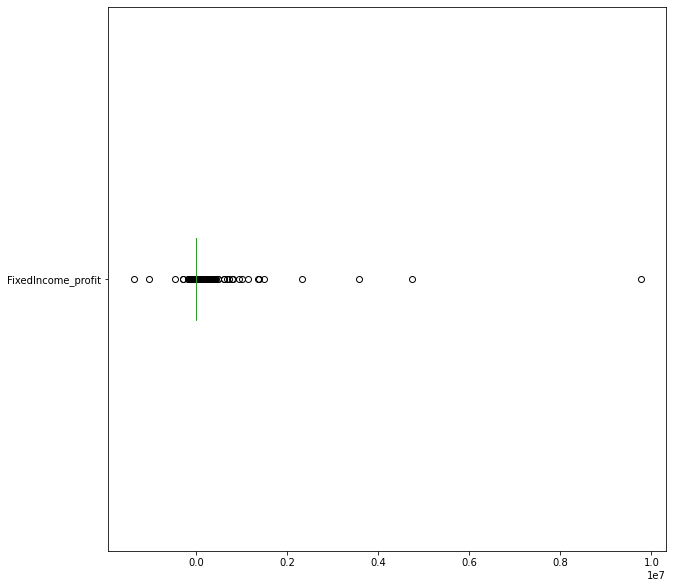

In [69]:
# Boxplotting Pendapatan Tetap dataframe
df2_PI.boxplot(column=['FixedIncome_profit'], fontsize=10, rot=0, grid=False, figsize=(10,10), vert=False)

In [70]:
# Calculate quartile 1 and 3
Q1 = df2_PI['FixedIncome_profit'].quantile(0.25)
Q3 = df2_PI['FixedIncome_profit'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 -135.0

Q3:
 433.0

IQR:
 568.0

Min:
 -987.0

Max:
 1285.0


In [71]:
# Filtering max & min values
PI_min = df2_PI['FixedIncome_profit']<boxplot_min
PI_max = df2_PI['FixedIncome_profit']>boxplot_max

df2_pi_clean = df2_PI[~
    (PI_min | PI_max)
    ]

df2_pi_clean

,user_id,date,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,FixedIncome_profit,FixedInc_Total_Trx,FixedInc_Buy,FixedInc_Sell,FixedIncome_Count,FixedInc_Total_Count
24,50961,2021-08-31,200117,200000,117,0,0,0,0,0
52,53759,2021-08-31,20066,20000,66,0,0,0,0,0
74,53759,2021-09-30,20109,20000,109,0,0,0,0,0
155,66145,2021-09-30,129748,130000,-252,0,0,0,0,0
174,67251,2021-09-30,419238,420000,-762,370000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
158800,4164264,2021-09-30,19974,20000,-26,0,0,0,0,0
158803,4164737,2021-09-30,59849,60000,-151,0,0,0,0,0
158805,4164993,2021-09-30,175081,175000,81,0,0,0,0,0
158808,4165630,2021-09-30,49869,50000,-131,0,0,0,0,0


Remaing 4,185 rows after we remove outliers.

7.3.3 Campuran dataframe

In [72]:
# Make dataframe for Campuran product
df2_c = df2_drop[['user_id','date','Campuran_AUM','Campuran_invested_amount','Campuran_profit','Campuran_Total_Trx','Mixed_Buy','Mixed_Sell','Mixed_Count','Mixed_Total_Count']].copy()
df2_c

,user_id,date,Campuran_AUM,Campuran_invested_amount,Campuran_profit,Campuran_Total_Trx,Mixed_Buy,Mixed_Sell,Mixed_Count,Mixed_Total_Count
1,50701,2021-08-31,10206945,10000000,206945,0,0,0,0,0
23,50701,2021-09-30,9943587,10000000,-56413,0,0,0,0,0
24,50961,2021-08-31,0,0,0,0,0,0,0,0
46,50961,2021-09-30,0,0,0,0,0,0,0,0
52,53759,2021-08-31,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0
158807,4165132,2021-09-30,0,0,0,0,0,0,0,0
158808,4165630,2021-09-30,0,0,0,0,0,0,0,0
158809,4165704,2021-09-30,0,0,0,0,0,0,0,0


In [73]:
# Removing rows with zero values
df2_c = df2_c.loc[(df2_c['Campuran_AUM'] != 0)]
df2_c

,user_id,date,Campuran_AUM,Campuran_invested_amount,Campuran_profit,Campuran_Total_Trx,Mixed_Buy,Mixed_Sell,Mixed_Count,Mixed_Total_Count
1,50701,2021-08-31,10206945,10000000,206945,0,0,0,0,0
23,50701,2021-09-30,9943587,10000000,-56413,0,0,0,0,0
203,71229,2021-08-31,666313,700000,-33687,-4300000,0,0,0,1
712,143839,2021-09-30,4974250,5000000,-25750,0,0,0,0,0
753,150248,2021-09-30,4974250,5000000,-25750,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
155207,4088922,2021-09-30,9872447,10000000,-127553,8000000,0,0,0,1
157679,4120490,2021-09-30,504728,500000,4728,0,0,0,0,0
157762,4122510,2021-09-30,200795,200000,795,0,0,0,0,0
157923,4125440,2021-09-30,9902592,10000000,-97408,0,0,0,0,0


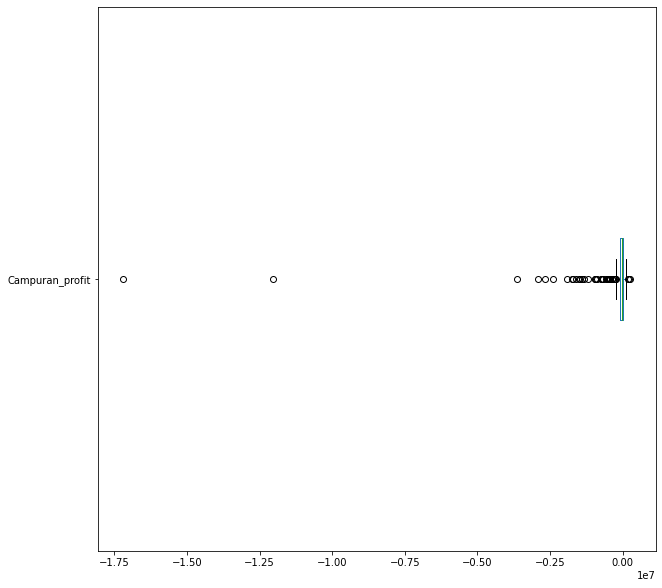

In [74]:
# Boxplotting Campuran dataframe
df2_c.boxplot(column=['Campuran_profit'], fontsize=10, rot=0, grid=False, figsize=(10,10), vert=False)

In [75]:
# Calculate quartile 1 and 3
Q1 = df2_c['Campuran_profit'].quantile(0.25)
Q3 = df2_c['Campuran_profit'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 -92825.75

Q3:
 263.75

IQR:
 93089.5

Min:
 -232460.0

Max:
 139898.0


In [76]:
# Filtering max & min values
c_min = df2_c['Campuran_profit']<boxplot_min
c_max = df2_c['Campuran_profit']>boxplot_max

df2_c_clean = df2_c[~
    (c_min | c_max)
    ]

df2_c_clean

,user_id,date,Campuran_AUM,Campuran_invested_amount,Campuran_profit,Campuran_Total_Trx,Mixed_Buy,Mixed_Sell,Mixed_Count,Mixed_Total_Count
23,50701,2021-09-30,9943587,10000000,-56413,0,0,0,0,0
203,71229,2021-08-31,666313,700000,-33687,-4300000,0,0,0,1
712,143839,2021-09-30,4974250,5000000,-25750,0,0,0,0,0
753,150248,2021-09-30,4974250,5000000,-25750,0,0,0,0,0
1089,234438,2021-09-30,991047,1000000,-8953,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
155207,4088922,2021-09-30,9872447,10000000,-127553,8000000,0,0,0,1
157679,4120490,2021-09-30,504728,500000,4728,0,0,0,0,0
157762,4122510,2021-09-30,200795,200000,795,0,0,0,0,0
157923,4125440,2021-09-30,9902592,10000000,-97408,0,0,0,0,0


Remains 259 rows after removing outliers.

## **9. Merging dataframes**

**Dataframes needed:**


*   **df_daily**
*   **df_monthly**

Dataframes to be merged for df_daily:

1.   df1 = cleaned user dataframe
2.   df2_a = calculated profit & total net transaction for each products

Dataframes to be merged for df_monthly:


1.   df1 = cleaned user dataframe
2.   df2_s_clean = cleaned Saham product dataframe
3.   df2_pu_clean = cleaned Pasar Uang product dataframe
4.   df2_pi_clean = cleaned Pendapatan Tetap product dataframe
5.   df2_c_clean = cleaned Campuran product dataframe



### 8.1 Creating dataframe df_daily

In [77]:
df1_m = df1.copy()
df1_m

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
0,162882,2021-09-17 14:10:44,Female,51,Swasta,> Rp 100 Juta,did not use,Gaji
1,3485491,2021-10-09 11:11:34,Female,55,Others,> Rp 50 Juta - 100 Juta,did not use,Gaji
2,1071649,2021-10-08 01:27:30,Male,50,Swasta,Rp 10 Juta - 50 Juta,did not use,Gaji
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji
4,3802293,2021-08-15 09:31:24,Female,47,Others,> Rp 100 Juta,used referral,Gaji
...,...,...,...,...,...,...,...,...
14707,4352347,2021-10-17 15:57:23,Male,49,Swasta,> Rp 100 Juta,did not use,Gaji
14708,4288026,2021-10-15 12:44:05,Female,49,Pengusaha,> Rp 100 Juta,did not use,Lainnya
14709,4286882,2021-10-11 10:06:15,Female,49,Swasta,> Rp 100 Juta,did not use,Dari Suami / istri
14710,4396739,2021-10-21 13:42:20,Male,49,Swasta,> Rp 100 Juta,did not use,Gaji


In [78]:
df_daily = df1_m.merge(df2_a, how='inner', on='user_id')
df_daily # Created df_daily

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,Saham_AUM,...,FixedInc_Total_Trx,Campuran_Total_Trx,Saham_Count,PasarUang_Count,FixedIncome_Count,Mixed_Count,Saham_Total_Count,PasarUang_Total_Count,FixedInc_Total_Count,Mixed_Total_Count
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-17,189109,...,0,0,0,0,0,0,0,0,0,0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-18,188542,...,0,0,0,0,0,0,0,0,0,0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-19,185228,...,0,0,0,0,0,0,0,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-20,184354,...,0,0,0,0,0,0,0,0,0,0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-23,186365,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta,did not use,Keuntungan Bisnis,2021-09-24,9900685,...,40000000,0,0,0,0,0,0,1,1,0
158807,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta,did not use,Keuntungan Bisnis,2021-09-27,9911149,...,40000000,0,0,0,0,0,0,1,1,0
158808,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta,did not use,Keuntungan Bisnis,2021-09-28,10018447,...,40000000,0,0,0,0,0,0,1,1,0
158809,3881981,2021-08-22 19:27:20,Female,49,Pengusaha,> Rp 100 Juta,did not use,Keuntungan Bisnis,2021-09-29,20161402,...,40000000,0,1,0,0,0,1,1,1,0


### 8.2 Creating dataframe df_monthly

Because we have removed outliers in each product (Step 7), we have to create dataframes of each products to be merged with user dataframe.italicized text

In [79]:
#Make saham dataframe
df2_s = df2_s_clean.copy()
df2_s

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit,Saham_Total_Trx,Saham_Buy,Saham_Sell,Saham_Count,Saham_Total_Count
24,50961,2021-08-31,716057,700000,16057,0,0,0,0,0
52,53759,2021-08-31,70839,70000,839,0,0,0,0,0
74,53759,2021-09-30,73179,70000,3179,0,0,0,0,0
155,66145,2021-09-30,249327,240000,9327,140000,0,0,0,1
174,67251,2021-09-30,584731,570000,14731,530000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
158799,4163940,2021-09-30,102688,100000,2688,0,0,0,0,0
158800,4164264,2021-09-30,10406,10000,406,0,0,0,0,0
158801,4164349,2021-09-30,10406,10000,406,0,0,0,0,0
158803,4164737,2021-09-30,10195,10000,195,0,0,0,0,0


In [80]:
#Pasar Uang dataframe without date
df2_pu = df2_pu_clean.copy()
df2_pu

,user_id,date,Pasar_Uang_AUM,Pasar_Uang_invested_amount,PasarUang_profit,PasarUang_Total_Trx,PasarUang_Buy,PasarUang_Sell,PasarUang_Count,PasarUang_Total_Count
24,50961,2021-08-31,100049,100000,49,0,0,0,0,0
46,50961,2021-09-30,700603,700000,603,600000,600000,0,1,1
52,53759,2021-08-31,10006,10000,6,0,0,0,0,0
74,53759,2021-09-30,10027,10000,27,0,0,0,0,0
155,66145,2021-09-30,29992,30000,-8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
158803,4164737,2021-09-30,130034,130000,34,0,0,0,0,0
158804,4164893,2021-09-30,10001,10000,1,0,0,0,0,0
158807,4165132,2021-09-30,10001,10000,1,0,0,0,0,0
158808,4165630,2021-09-30,10001,10000,1,0,0,0,0,0


In [81]:
# Pendapatan tetap dataframe
df2_pi = df2_pi_clean.copy()
df2_pi

,user_id,date,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,FixedIncome_profit,FixedInc_Total_Trx,FixedInc_Buy,FixedInc_Sell,FixedIncome_Count,FixedInc_Total_Count
24,50961,2021-08-31,200117,200000,117,0,0,0,0,0
52,53759,2021-08-31,20066,20000,66,0,0,0,0,0
74,53759,2021-09-30,20109,20000,109,0,0,0,0,0
155,66145,2021-09-30,129748,130000,-252,0,0,0,0,0
174,67251,2021-09-30,419238,420000,-762,370000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
158800,4164264,2021-09-30,19974,20000,-26,0,0,0,0,0
158803,4164737,2021-09-30,59849,60000,-151,0,0,0,0,0
158805,4164993,2021-09-30,175081,175000,81,0,0,0,0,0
158808,4165630,2021-09-30,49869,50000,-131,0,0,0,0,0


In [82]:
# Make dataframe for Campuran product
df2_ca = df2_c_clean.copy()
df2_ca

,user_id,date,Campuran_AUM,Campuran_invested_amount,Campuran_profit,Campuran_Total_Trx,Mixed_Buy,Mixed_Sell,Mixed_Count,Mixed_Total_Count
23,50701,2021-09-30,9943587,10000000,-56413,0,0,0,0,0
203,71229,2021-08-31,666313,700000,-33687,-4300000,0,0,0,1
712,143839,2021-09-30,4974250,5000000,-25750,0,0,0,0,0
753,150248,2021-09-30,4974250,5000000,-25750,0,0,0,0,0
1089,234438,2021-09-30,991047,1000000,-8953,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
155207,4088922,2021-09-30,9872447,10000000,-127553,8000000,0,0,0,1
157679,4120490,2021-09-30,504728,500000,4728,0,0,0,0,0
157762,4122510,2021-09-30,200795,200000,795,0,0,0,0,0
157923,4125440,2021-09-30,9902592,10000000,-97408,0,0,0,0,0


#### 8.2.1 Merging product dataframes.

In [83]:
df_p = df2_s.merge(df2_pu, how='outer', on=['user_id','date']).merge(df2_pi, how='outer', on=['user_id','date']).merge(df2_ca, how='outer', on=['user_id','date'])
df_p

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_profit,Saham_Total_Trx,Saham_Buy,Saham_Sell,Saham_Count,Saham_Total_Count,...,FixedIncome_Count,FixedInc_Total_Count,Campuran_AUM,Campuran_invested_amount,Campuran_profit,Campuran_Total_Trx,Mixed_Buy,Mixed_Sell,Mixed_Count,Mixed_Total_Count
0,50961,2021-08-31,716057.0,700000.0,16057.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53759,2021-08-31,70839.0,70000.0,839.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53759,2021-09-30,73179.0,70000.0,3179.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66145,2021-09-30,249327.0,240000.0,9327.0,140000.0,0.0,0.0,0.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67251,2021-09-30,584731.0,570000.0,14731.0,530000.0,0.0,0.0,0.0,1.0,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,4080962,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,40047899.0,40000000.0,47899.0,20000000.0,0.0,0.0,0.0,1.0
7733,4084664,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,990904.0,1000000.0,-9096.0,0.0,0.0,0.0,0.0,0.0
7734,4088922,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9872447.0,10000000.0,-127553.0,8000000.0,0.0,0.0,0.0,1.0
7735,4125440,2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9902592.0,10000000.0,-97408.0,0.0,0.0,0.0,0.0,0.0


#### 8.2.2 Merging product dataframe (df_p) with user dataframe (df1_m).

In [84]:
# Merge dataframes
df_monthly = df1_m.merge(df_p, how='inner', on='user_id')
df_monthly

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,Saham_AUM,...,FixedIncome_Count,FixedInc_Total_Count,Campuran_AUM,Campuran_invested_amount,Campuran_profit,Campuran_Total_Trx,Mixed_Buy,Mixed_Sell,Mixed_Count,Mixed_Total_Count
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-31,186071.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-09-30,297141.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3802293,2021-08-15 09:31:24,Female,47,Others,> Rp 100 Juta,used referral,Gaji,2021-09-30,NaN,...,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,did not use,Gaji,2021-09-30,41545.0,...,0.0,0.0,910285.0,899000.0,11285.0,149000.0,149000.0,0.0,1.0,1.0
4,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,2021-09-30,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,4072318,2021-09-16 20:35:32,Male,49,Swasta,> Rp 100 Juta,did not use,Gaji,2021-09-30,NaN,...,NaN,NaN,982533.0,1000000.0,-17467.0,0.0,0.0,0.0,0.0,0.0
7733,3965617,2021-09-03 09:11:34,Female,49,IRT,> Rp 100 Juta,did not use,Keuntungan Bisnis,2021-09-30,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7734,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta,did not use,Lainnya,2021-08-31,183353.0,...,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7735,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-31,106802.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
# Check for NA values
df_monthly.isna()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,Saham_AUM,...,FixedIncome_Count,FixedInc_Total_Count,Campuran_AUM,Campuran_invested_amount,Campuran_profit,Campuran_Total_Trx,Mixed_Buy,Mixed_Sell,Mixed_Count,Mixed_Total_Count
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,False,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,False
7733,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,True,True,True,True,True
7734,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
7735,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True


In [86]:
# Replace NA values with 0, because NA means no transaction for that user in that specific product
df_monthly.fillna(0, inplace=True)
df_monthly

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,Saham_AUM,...,FixedIncome_Count,FixedInc_Total_Count,Campuran_AUM,Campuran_invested_amount,Campuran_profit,Campuran_Total_Trx,Mixed_Buy,Mixed_Sell,Mixed_Count,Mixed_Total_Count
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-31,186071.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-09-30,297141.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3802293,2021-08-15 09:31:24,Female,47,Others,> Rp 100 Juta,used referral,Gaji,2021-09-30,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,did not use,Gaji,2021-09-30,41545.0,...,0.0,0.0,910285.0,899000.0,11285.0,149000.0,149000.0,0.0,1.0,1.0
4,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,2021-09-30,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7732,4072318,2021-09-16 20:35:32,Male,49,Swasta,> Rp 100 Juta,did not use,Gaji,2021-09-30,0.0,...,0.0,0.0,982533.0,1000000.0,-17467.0,0.0,0.0,0.0,0.0,0.0
7733,3965617,2021-09-03 09:11:34,Female,49,IRT,> Rp 100 Juta,did not use,Keuntungan Bisnis,2021-09-30,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7734,3773859,2021-08-06 13:10:06,Male,49,Swasta,> Rp 100 Juta,did not use,Lainnya,2021-08-31,183353.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7735,3670811,2021-08-02 11:11:03,Male,49,Swasta,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-31,106802.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7737 entries, 0 to 7736
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           7737 non-null   object        
 1   registration_import_datetime      7737 non-null   datetime64[ns]
 2   user_gender                       7737 non-null   object        
 3   user_age                          7737 non-null   int64         
 4   user_occupation                   7737 non-null   object        
 5   user_income_range                 7737 non-null   object        
 6   referral_code_used                7737 non-null   object        
 7   user_income_source                7737 non-null   object        
 8   date                              7737 non-null   datetime64[ns]
 9   Saham_AUM                         7737 non-null   float64       
 10  Saham_invested_amount             7737 non-null 

In [88]:
df_monthly = df_monthly.astype(dict.fromkeys(df_monthly.columns[9:37], int))
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7737 entries, 0 to 7736
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           7737 non-null   object        
 1   registration_import_datetime      7737 non-null   datetime64[ns]
 2   user_gender                       7737 non-null   object        
 3   user_age                          7737 non-null   int64         
 4   user_occupation                   7737 non-null   object        
 5   user_income_range                 7737 non-null   object        
 6   referral_code_used                7737 non-null   object        
 7   user_income_source                7737 non-null   object        
 8   date                              7737 non-null   datetime64[ns]
 9   Saham_AUM                         7737 non-null   int64         
 10  Saham_invested_amount             7737 non-null 

## **10. Final Datasets**

Our final datasets to be used in next analysis:

1.  df_daily = daily transactions of each users.
2.  df_monthly = monthly transaction of each users.

### 10.1 df_daily

In [89]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   registration_import_datetime         158811 non-null  datetime64[ns]
 2   user_gender                          158811 non-null  object        
 3   user_age                             158811 non-null  int64         
 4   user_occupation                      158811 non-null  object        
 5   user_income_range                    158811 non-null  object        
 6   referral_code_used                   158811 non-null  object        
 7   user_income_source                   158811 non-null  object        
 8   date                                 158811 non-null  datetime64[ns]
 9   Saham_AUM                            158811 non-null  int64         
 

In [90]:
df_daily.head(10)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,Saham_AUM,...,FixedInc_Total_Trx,Campuran_Total_Trx,Saham_Count,PasarUang_Count,FixedIncome_Count,Mixed_Count,Saham_Total_Count,PasarUang_Total_Count,FixedInc_Total_Count,Mixed_Total_Count
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-17,189109,...,0,0,0,0,0,0,0,0,0,0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-18,188542,...,0,0,0,0,0,0,0,0,0,0
2,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-19,185228,...,0,0,0,0,0,0,0,0,0,0
3,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-20,184354,...,0,0,0,0,0,0,0,0,0,0
4,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-23,186365,...,0,0,0,0,0,0,0,0,0,0
5,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-24,185623,...,0,0,0,0,0,0,0,0,0,0
6,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-25,185627,...,0,0,0,0,0,0,0,0,0,0
7,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-26,184297,...,0,0,0,0,0,0,0,0,0,0
8,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-27,182825,...,0,0,0,0,0,0,0,0,0,0
9,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-30,186246,...,0,0,0,0,0,0,0,0,0,0


### 10.2 df_monthly

In [91]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7737 entries, 0 to 7736
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           7737 non-null   object        
 1   registration_import_datetime      7737 non-null   datetime64[ns]
 2   user_gender                       7737 non-null   object        
 3   user_age                          7737 non-null   int64         
 4   user_occupation                   7737 non-null   object        
 5   user_income_range                 7737 non-null   object        
 6   referral_code_used                7737 non-null   object        
 7   user_income_source                7737 non-null   object        
 8   date                              7737 non-null   datetime64[ns]
 9   Saham_AUM                         7737 non-null   int64         
 10  Saham_invested_amount             7737 non-null 

In [92]:
df_monthly.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,date,Saham_AUM,...,FixedIncome_Count,FixedInc_Total_Count,Campuran_AUM,Campuran_invested_amount,Campuran_profit,Campuran_Total_Trx,Mixed_Buy,Mixed_Sell,Mixed_Count,Mixed_Total_Count
0,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-08-31,186071,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,3816789,2021-08-12 07:19:32,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,Gaji,2021-09-30,297141,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,3802293,2021-08-15 09:31:24,Female,47,Others,> Rp 100 Juta,used referral,Gaji,2021-09-30,0,...,0,2,0,0,0,0,0.0,0.0,0.0,0.0
3,3049927,2021-08-29 03:56:26,Male,53,Swasta,< 10 Juta,did not use,Gaji,2021-09-30,41545,...,0,0,910285,899000,11285,149000,149000.0,0.0,1.0,1.0
4,3836491,2021-08-18 11:32:25,Male,59,Others,< 10 Juta,used referral,Lainnya,2021-09-30,0,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


## **11. Descriptive Statistics**

1.  df_daily desc stat
2.  df_monthly desc stat

### 11.1 df_daily desc stat numerical columns

In [93]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns  

In [94]:
daily_descstat = df_daily.describe()
daily_descstat = round(daily_descstat,2)
daily_descstat.loc['skew'] = df_daily[9:29].skew()
daily_descstat.loc['variance'] = df_daily[9:29].var()
daily_descstat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,user_age,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,...,FixedInc_Total_Trx,Campuran_Total_Trx,Saham_Count,PasarUang_Count,FixedIncome_Count,Mixed_Count,Saham_Total_Count,PasarUang_Total_Count,FixedInc_Total_Count,Mixed_Total_Count
count,158811.00,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,1.588110e+05,...,1.588110e+05,158811.00,158811.000000,158811.00,158811.00,158811.00,158811.000000,158811.00,158811.00,158811.00
mean,27.20,2.974978e+05,2.960576e+05,7.110490e+03,6.955849e+05,6.940755e+05,1.705964e+04,1.193030e+06,1.189113e+06,3.640097e+04,...,4.000694e+05,26166.50,0.030000,0.04,0.04,0.00,0.330000,0.40,0.36,0.01
std,8.58,1.770372e+06,1.759649e+06,2.710200e+05,1.284331e+07,1.281471e+07,1.301468e+06,1.921726e+07,1.913287e+07,2.346995e+06,...,1.006134e+07,1032390.49,0.180000,0.20,0.19,0.03,0.760000,0.83,0.79,0.14
min,17.00,0.000000e+00,0.000000e+00,-1.176680e+07,0.000000e+00,0.000000e+00,-1.850000e+08,0.000000e+00,0.000000e+00,-9.271240e+07,...,-8.000000e+07,-50000000.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
25%,21.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
50%,25.00,1.008300e+04,1.000000e+04,0.000000e+00,1.001900e+04,1.000000e+04,0.000000e+00,2.501700e+04,2.500000e+04,0.000000e+00,...,0.000000e+00,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00
75%,31.00,1.005060e+05,1.000000e+05,0.000000e+00,1.001110e+05,1.000000e+05,0.000000e+00,1.101590e+05,1.100000e+05,0.000000e+00,...,0.000000e+00,0.00,0.000000,0.00,0.00,0.00,0.000000,1.00,0.00,0.00
max,83.00,6.445433e+07,6.184000e+07,5.000000e+07,1.016171e+09,1.012200e+09,2.892000e+08,9.797670e+08,9.700000e+08,4.000000e+08,...,7.700000e+08,50000000.00,1.000000,1.00,1.00,1.00,17.000000,17.00,14.00,7.00
skew,0.00,6.784467e-01,6.811611e-01,4.472136e+00,-5.950204e-02,0.000000e+00,0.000000e+00,2.297995e-01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.00,4.472136,0.00,0.00,0.00,0.681161,0.00,0.00,0.00
variance,0.00,2.482425e+09,2.394737e+09,5.000000e+08,1.583839e+03,0.000000e+00,0.000000e+00,6.429340e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,0.00,0.050000,0.00,0.00,0.00,0.239474,0.00,0.00,0.00


### 11.2 df_daily desc stat categorical columns

In [95]:
df_daily.describe(exclude = np.number)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user_id,registration_import_datetime,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source,date,Month
count,158811,158811,158811,158811,158811,158811,158811,158811,158811
unique,8277,6581,2,5,4,2,10,42,2
top,3740513,2021-08-02 13:38:02,Male,Pelajar,< 10 Juta,did not use,Gaji,2021-09-30 00:00:00,September
freq,42,164,97149,88865,68500,107440,99611,8277,127766
first,NaN,2021-08-01 00:11:14,NaN,NaN,NaN,NaN,NaN,2021-08-04 00:00:00,NaN
last,NaN,2021-09-28 13:20:00,NaN,NaN,NaN,NaN,NaN,2021-09-30 00:00:00,NaN


**Summary Insight**

Numerical:
1. There are 158,811 records.
2. Minimum investment is 0, because users mostly invested on 1 or 2 products. 0 investment means they are not investing in that product.
3. Largest investment is made on Fixed Income product, which amounted IDR 970,000,000 and on average is IDR 2,346,995.
4. Largest profit made by user is on Fixed Income product, which amounted IDR 9,766,956.
5. Largest loss occurred is on Mixed investment product, which amounted IDR 24,781,029.
6. Youngest investor is 17 years old, while the oldest investor is 83 years old.

Categorical:
1.  There are 8,277 users.
2.  There are 10 types of user income sources.
3.  There are 9 types of user occupation.

### 11.3 df_monthly desc stat numerical columns

In [96]:
monthly_descstat = df_monthly.describe()
monthly_descstat = round(monthly_descstat,2)
monthly_descstat.loc['skew'] = df_monthly[9:25].skew()
monthly_descstat.loc['variance'] = df_monthly[9:25].var()
monthly_descstat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


,user_age,Saham_AUM,Saham_invested_amount,Saham_profit,Saham_Total_Trx,Saham_Buy,Saham_Sell,Saham_Count,Saham_Total_Count,Pasar_Uang_AUM,...,FixedIncome_Count,FixedInc_Total_Count,Campuran_AUM,Campuran_invested_amount,Campuran_profit,Campuran_Total_Trx,Mixed_Buy,Mixed_Sell,Mixed_Count,Mixed_Total_Count
count,7737.000000,7.737000e+03,7.737000e+03,7.737000e+03,7737.00,7737.00,7737.00,7737.00,7737.00,7.737000e+03,...,7737.00,7737.00,7737.00,7737.00,7737.00,7737.00,7737.00,7737.0,7737.00,7737.00
mean,27.450000,9.454011e+04,9.249122e+04,2.048900e+03,19135.15,2865.10,-561.84,0.03,0.30,7.549048e+04,...,0.02,0.28,121929.15,122893.06,-963.91,27100.38,2098.23,0.0,0.00,0.01
std,8.460000,2.250734e+05,2.233748e+05,3.487030e+03,139117.68,26378.49,20966.58,0.16,0.73,2.038406e+05,...,0.14,0.74,1509596.46,1513837.88,11485.46,543940.23,118391.42,0.0,0.03,0.15
min,17.000000,0.000000e+00,0.000000e+00,-9.176000e+03,-3550000.00,0.00,-1410000.00,0.00,0.00,0.000000e+00,...,0.00,0.00,0.00,0.00,-226311.00,-4300000.00,0.00,0.0,0.00,0.00
25%,21.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,1.000200e+04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
50%,25.000000,4.128800e+04,4.000000e+04,6.190000e+02,0.00,0.00,0.00,0.00,0.00,1.504200e+04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
75%,31.000000,1.028890e+05,1.000000e+05,2.573000e+03,0.00,0.00,0.00,0.00,0.00,1.000490e+05,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
max,74.000000,8.005968e+06,8.000000e+06,1.772300e+04,5210000.00,560000.00,0.00,1.00,8.00,7.740597e+06,...,1.00,13.00,53813353.00,54000000.00,131347.00,20000000.00,10000000.00,0.0,1.00,5.00
skew,-0.173831,3.634082e+00,3.643527e+00,2.090536e+00,0.00,0.00,0.00,0.00,0.00,9.891311e-01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
variance,11.229167,6.310084e+10,6.181292e+10,9.637773e+06,0.00,0.00,0.00,0.00,0.00,1.417672e+09,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00


### 11.4 df_monthly desc stat categorical columns

In [97]:
df_monthly.describe(exclude = np.number)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,user_id,registration_import_datetime,user_gender,user_occupation,user_income_range,referral_code_used,user_income_source,date
count,7737,7737,7737,7737,7737,7737,7737,7737
unique,6037,5085,2,5,4,2,10,2
top,3816789,2021-08-12 07:19:32,Male,Pelajar,< 10 Juta,did not use,Gaji,2021-09-30 00:00:00
freq,2,6,4505,4236,3346,5575,4790,5431
first,NaN,2021-08-01 00:11:14,NaN,NaN,NaN,NaN,NaN,2021-08-31 00:00:00
last,NaN,2021-09-28 13:20:00,NaN,NaN,NaN,NaN,NaN,2021-09-30 00:00:00


**Summary Insight**

*Note: We removed the outliers for this dataframe*

Numerical:
1. There are 7,737 records.
2. Largest investment is made on Mixed product, amounted IDR 54,000,000 and on average is IDR 122,894.
3. Largest profit made by user is on Mixed product, amounted IDR 11,485.
4. Largest loss occurred is on Stocks product, amounted IDR 1,410,000.
5. Youngest investor is 17 years old, and oldest is 74 years old.

Categorical:
1. There are 6,037 users.

## **12. EDA**

### 12.1 % User by Gender

In [98]:
EDA_1 = df_daily.copy()
EDA_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  object        
 1   registration_import_datetime         158811 non-null  datetime64[ns]
 2   user_gender                          158811 non-null  object        
 3   user_age                             158811 non-null  int64         
 4   user_occupation                      158811 non-null  object        
 5   user_income_range                    158811 non-null  object        
 6   referral_code_used                   158811 non-null  object        
 7   user_income_source                   158811 non-null  object        
 8   date                                 158811 non-null  datetime64[ns]
 9   Saham_AUM                            158811 non-null  int64         
 

In [99]:
EDA_1 = EDA_1.groupby('user_gender')['user_id'].agg('nunique').reset_index()
EDA_1.columns = ['user_gender','Num of User']
EDA_1

,user_gender,Num of User
0,Female,3101
1,Male,5176


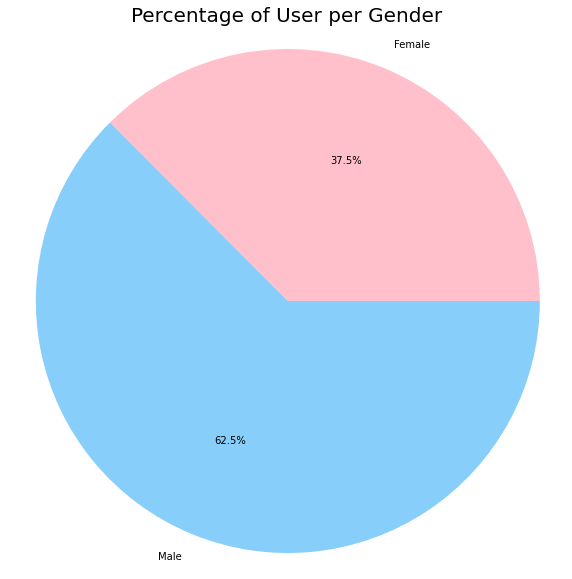

In [100]:
plt.figure(figsize=(10, 10))

data = EDA_1['Num of User']
labels = EDA_1['user_gender']

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=('pink','lightskyblue'))
plt.title('Percentage of User per Gender', fontsize=20)
plt.axis('equal')
plt.savefig('gender.png', bbox_inches='tight')

### 12.2 User Characteristics

In [101]:
EDA_5 = df_monthly.copy()
EDA_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7737 entries, 0 to 7736
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           7737 non-null   object        
 1   registration_import_datetime      7737 non-null   datetime64[ns]
 2   user_gender                       7737 non-null   object        
 3   user_age                          7737 non-null   int64         
 4   user_occupation                   7737 non-null   object        
 5   user_income_range                 7737 non-null   object        
 6   referral_code_used                7737 non-null   object        
 7   user_income_source                7737 non-null   object        
 8   date                              7737 non-null   datetime64[ns]
 9   Saham_AUM                         7737 non-null   int64         
 10  Saham_invested_amount             7737 non-null 

In [102]:
EDA_5 = EDA_5.groupby('user_occupation')['user_id'].agg('count').reset_index()
EDA_5.columns = ['Occupation','Num of User']
EDA_5.sort_values(by='Num of User',ascending=False,inplace=True)
EDA_5

,Occupation,Num of User
2,Pelajar,4236
4,Swasta,1858
1,Others,955
0,IRT,406
3,Pengusaha,282


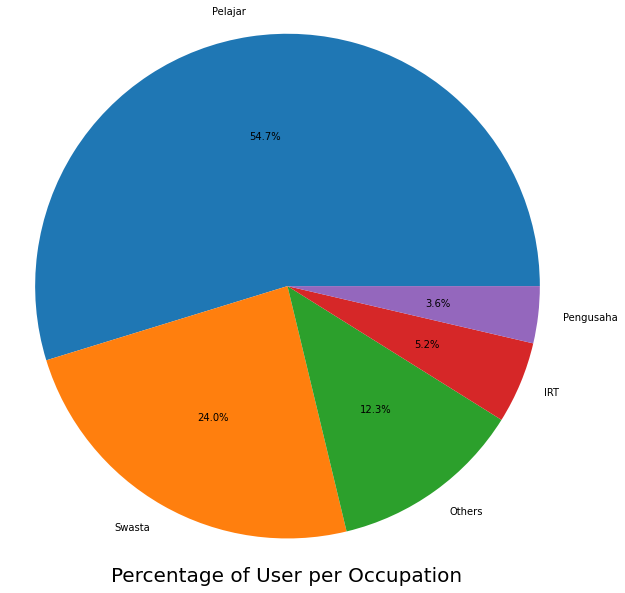

In [103]:
plt.figure(figsize=(10, 10))

data = EDA_5['Num of User']
labels = EDA_5['Occupation']

plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title('Percentage of User per Occupation', y=-0.05, fontsize=20)
plt.axis('equal')
plt.savefig('user occupation.png', bbox_inches='tight')

In [104]:
EDA_5b = df_monthly.copy()
EDA_5b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7737 entries, 0 to 7736
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           7737 non-null   object        
 1   registration_import_datetime      7737 non-null   datetime64[ns]
 2   user_gender                       7737 non-null   object        
 3   user_age                          7737 non-null   int64         
 4   user_occupation                   7737 non-null   object        
 5   user_income_range                 7737 non-null   object        
 6   referral_code_used                7737 non-null   object        
 7   user_income_source                7737 non-null   object        
 8   date                              7737 non-null   datetime64[ns]
 9   Saham_AUM                         7737 non-null   int64         
 10  Saham_invested_amount             7737 non-null 

In [105]:
EDA_5b = EDA_5b.groupby('user_income_range')['user_id'].agg('count').reset_index()
EDA_5b.columns = ['Income Range','Num of User']
EDA_5b.sort_values(by='Num of User',ascending=False,inplace=True)
EDA_5b

,Income Range,Num of User
0,< 10 Juta,3346
3,Rp 10 Juta - 50 Juta,2431
2,> Rp 50 Juta - 100 Juta,1300
1,> Rp 100 Juta,660


We can group income range Rp 100 million above as one group because their total is also small compare to others.

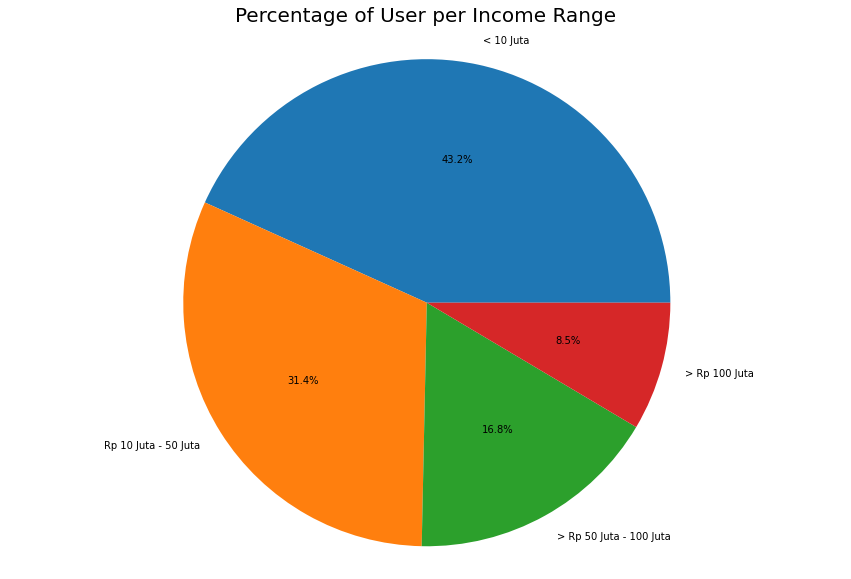

In [106]:
plt.figure(figsize=(15, 10))

data = EDA_5b['Num of User']
labels = EDA_5b['Income Range']

plt.pie(data,labels=labels,autopct='%1.1f%%')
plt.title('Percentage of User per Income Range', fontsize=20)
plt.axis('equal')
plt.savefig('user income range.png', bbox_inches='tight')

In [107]:
EDA_5c = df_monthly['user_age'].copy()
EDA_5c

0       53
1       53
2       47
3       53
4       59
        ..
7732    49
7733    49
7734    49
7735    49
7736    49
Name: user_age, Length: 7737, dtype: int64

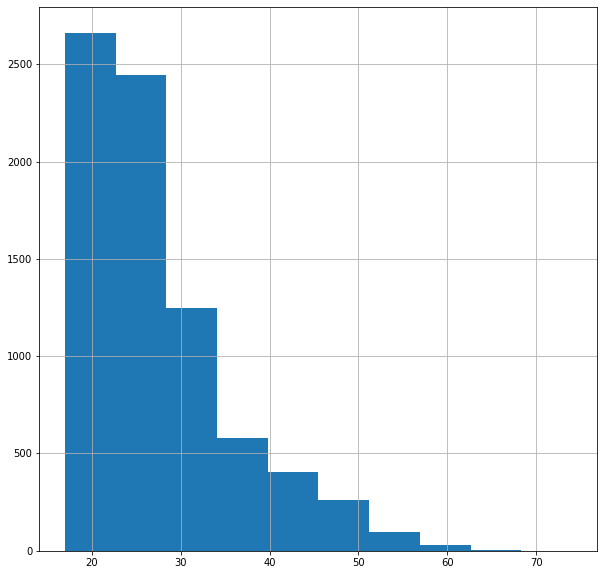

In [108]:
EDA_5c.hist(figsize=(10,10))

**Summary Insight**

*  Most of our users are students, while the rest are working as corporate 
employees, full-time mother and others.
*  Most of our users are coming from lower to middle class income. 
*  Only less than 10% of our users are coming from upper class income.
*  Most of our users are between 17 - 27 years old.


### 12.3 % Use Referral Codes

In [109]:
EDA_6 = df_monthly.copy()
EDA_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7737 entries, 0 to 7736
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           7737 non-null   object        
 1   registration_import_datetime      7737 non-null   datetime64[ns]
 2   user_gender                       7737 non-null   object        
 3   user_age                          7737 non-null   int64         
 4   user_occupation                   7737 non-null   object        
 5   user_income_range                 7737 non-null   object        
 6   referral_code_used                7737 non-null   object        
 7   user_income_source                7737 non-null   object        
 8   date                              7737 non-null   datetime64[ns]
 9   Saham_AUM                         7737 non-null   int64         
 10  Saham_invested_amount             7737 non-null 

In [110]:
EDA_6 = EDA_6.groupby('referral_code_used')['user_id'].agg('count').reset_index()
EDA_6.columns = ['Use Referral Code','Num of User']
EDA_6

,Use Referral Code,Num of User
0,did not use,5575
1,used referral,2162


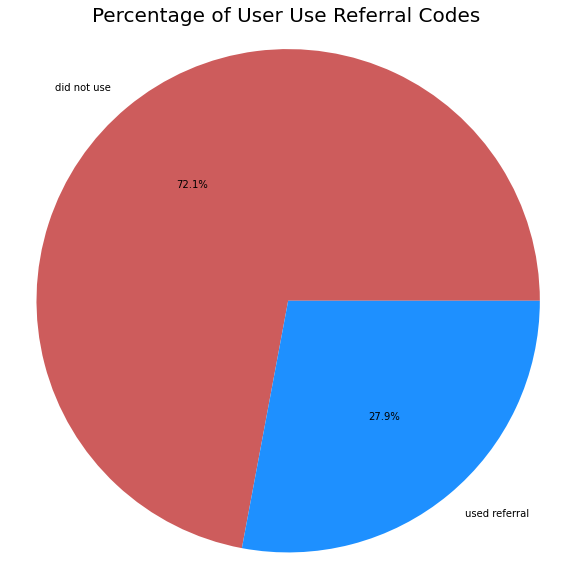

In [111]:
plt.figure(figsize=(10, 10))

data = EDA_6['Num of User']
labels = EDA_6['Use Referral Code']

plt.pie(data,labels=labels,autopct='%1.1f%%',colors=('indianred','dodgerblue'))
plt.title('Percentage of User Use Referral Codes', fontsize=20)
plt.axis('equal')
plt.savefig('referral_codes.png', bbox_inches='tight')

**Summary Insight**

Most of our users are students and corporate employees with income ranging below IDR 10 million until IDR 50 million. Most of them did not use referral codes.

### 12.4 Number of Daily Transaction

In [112]:
EDA_2 = df_daily[['user_id','date','Saham_Count','PasarUang_Count','FixedIncome_Count','Mixed_Count']].copy()
EDA_2.head()

,user_id,date,Saham_Count,PasarUang_Count,FixedIncome_Count,Mixed_Count
0,3816789,2021-08-17,0,0,0,0
1,3816789,2021-08-18,0,0,0,0
2,3816789,2021-08-19,0,0,0,0
3,3816789,2021-08-20,0,0,0,0
4,3816789,2021-08-23,0,0,0,0


In [113]:
EDA_2 = EDA_2.groupby('date')[['Saham_Count','PasarUang_Count','FixedIncome_Count','Mixed_Count']].agg('sum').reset_index()
EDA_2.columns = ['date','Stocks Count','Money Market Count','Fixed Income Count','Mixed Count']
EDA_2

,date,Stocks Count,Money Market Count,Fixed Income Count,Mixed Count
0,2021-08-04,0,0,0,0
1,2021-08-05,5,9,5,0
2,2021-08-06,13,18,23,1
3,2021-08-09,27,29,34,3
4,2021-08-10,30,36,32,1
5,2021-08-11,49,64,52,3
6,2021-08-12,18,19,14,0
7,2021-08-13,40,61,48,2
8,2021-08-16,62,93,102,4
9,2021-08-17,41,50,45,2


In [114]:
EDA_2tf = EDA_2
EDA_2tf = EDA_2tf.melt('date', var_name='column', value_name='value')
EDA_2tf

,date,column,value
0,2021-08-04,Stocks Count,0
1,2021-08-05,Stocks Count,5
2,2021-08-06,Stocks Count,13
3,2021-08-09,Stocks Count,27
4,2021-08-10,Stocks Count,30
...,...,...,...
163,2021-09-24,Mixed Count,6
164,2021-09-27,Mixed Count,4
165,2021-09-28,Mixed Count,5
166,2021-09-29,Mixed Count,7


In [115]:
EDA_2b = EDA_2tf.copy()
EDA_2b = EDA_2b.groupby('column')['value'].agg('mean').reset_index()
EDA_2b

,column,value
0,Fixed Income Count,134.928571
1,Mixed Count,4.214286
2,Money Market Count,153.238095
3,Stocks Count,125.690476


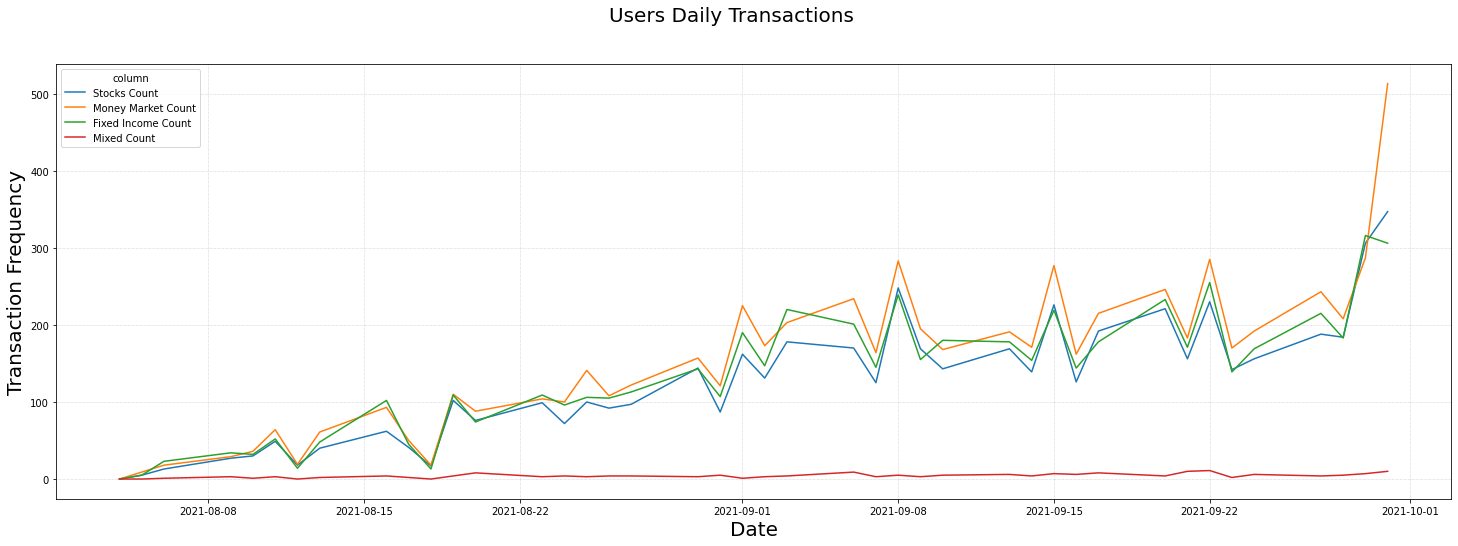

In [116]:
# create the visualization of the data
fig = plt.figure(figsize=(25, 8)) #to set the figure size

fig.suptitle('Users Daily Transactions', fontsize=20) # to set the chart title and its font size
plt.xlabel('Date', fontsize=20) # to set the axis title and its font size
plt.ylabel('Transaction Frequency', fontsize=20)  # to set the axis title and its font size

sns.lineplot(data = EDA_2tf, x = 'date', y = 'value', hue = 'column')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.savefig('daily trx.png', bbox_inches='tight')

**Insight:**

Number of transactions are ranging from 0 to 500 transactions a day, except for Mixed Investment where the daily transactions count only ranging between 1 to 10 transactions a day. We can see in the chart that number of daily transactions is very fluctuative but overall increased. It reached a peak every Thursday, and then dropped again every weekend due to market closed.

### 12.5 Average Balance AUM at the End of Period

#### 12.3.1 Average AUM Stocks

In [117]:
EDA_3 = df_monthly[['user_id','date','user_income_range','Saham_AUM']].copy()
EDA_3

,user_id,date,user_income_range,Saham_AUM
0,3816789,2021-08-31,> Rp 50 Juta - 100 Juta,186071
1,3816789,2021-09-30,> Rp 50 Juta - 100 Juta,297141
2,3802293,2021-09-30,> Rp 100 Juta,0
3,3049927,2021-09-30,< 10 Juta,41545
4,3836491,2021-09-30,< 10 Juta,0
...,...,...,...,...
7732,4072318,2021-09-30,> Rp 100 Juta,0
7733,3965617,2021-09-30,> Rp 100 Juta,0
7734,3773859,2021-08-31,> Rp 100 Juta,183353
7735,3670811,2021-08-31,> Rp 50 Juta - 100 Juta,106802


In [118]:
EDA_3 = EDA_3[EDA_3['Saham_AUM']!=0]
EDA_3['Month'] = EDA_3['date'].dt.month_name()
EDA_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,date,user_income_range,Saham_AUM,Month
0,3816789,2021-08-31,> Rp 50 Juta - 100 Juta,186071,August
1,3816789,2021-09-30,> Rp 50 Juta - 100 Juta,297141,September
3,3049927,2021-09-30,< 10 Juta,41545,September
5,3718933,2021-08-31,> Rp 100 Juta,249731,August
7,3820160,2021-08-31,> Rp 50 Juta - 100 Juta,30666,August
...,...,...,...,...,...
7726,3973913,2021-09-30,> Rp 50 Juta - 100 Juta,382361,September
7727,3993275,2021-09-30,> Rp 50 Juta - 100 Juta,20357,September
7734,3773859,2021-08-31,> Rp 100 Juta,183353,August
7735,3670811,2021-08-31,> Rp 50 Juta - 100 Juta,106802,August


In [119]:
EDA_31 = EDA_3.groupby(['Month','user_income_range'])['Saham_AUM'].agg('mean').reset_index()
EDA_31.columns = ['Month','Income Range','Stocks AVG AUM']
EDA_31

,Month,Income Range,Stocks AVG AUM
0,August,< 10 Juta,108203.681159
1,August,> Rp 100 Juta,404558.655629
2,August,> Rp 50 Juta - 100 Juta,264297.236364
3,August,Rp 10 Juta - 50 Juta,171159.123667
4,September,< 10 Juta,104245.792000
5,September,> Rp 100 Juta,218255.057348
6,September,> Rp 50 Juta - 100 Juta,164001.203306
7,September,Rp 10 Juta - 50 Juta,129882.125664


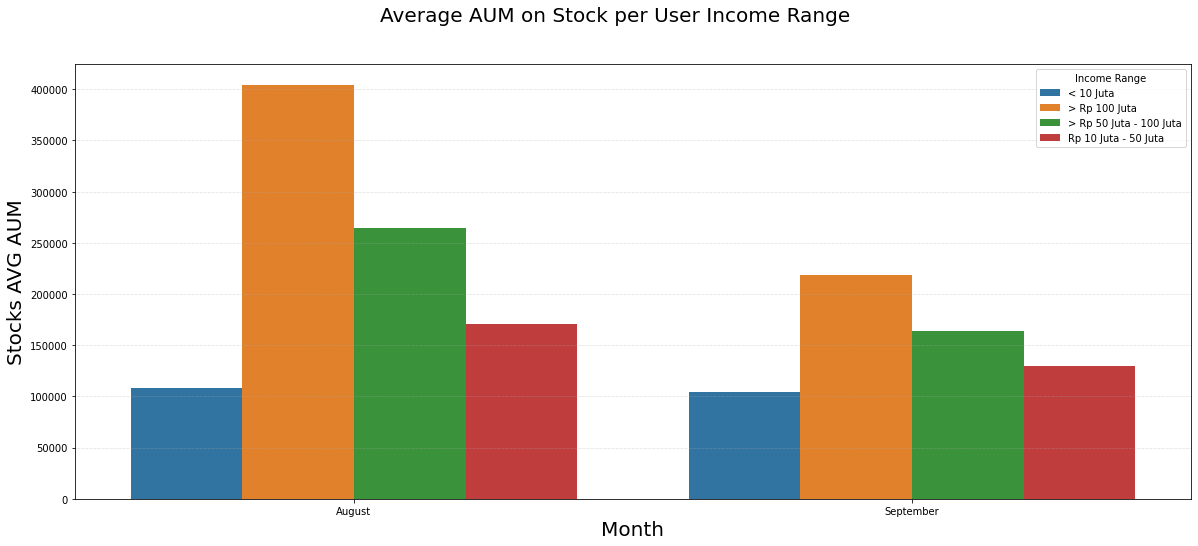

In [120]:
fig = plt.figure(figsize=(20, 8))

fig.suptitle('Average AUM on Stock per User Income Range', fontsize=20)
plt.xlabel('Period', fontsize=20)
plt.ylabel('Average AUM', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.barplot(data=EDA_31, x="Month", y="Stocks AVG AUM", hue="Income Range")
plt.savefig('AUM stocks.png', bbox_inches='tight')

#### 12.3.2 Average AUM Money Market

In [121]:
EDA_3b = df_monthly[['user_id','date','user_income_range','Pasar_Uang_AUM']].copy()
EDA_3b

,user_id,date,user_income_range,Pasar_Uang_AUM
0,3816789,2021-08-31,> Rp 50 Juta - 100 Juta,40090
1,3816789,2021-09-30,> Rp 50 Juta - 100 Juta,40235
2,3802293,2021-09-30,> Rp 100 Juta,0
3,3049927,2021-09-30,< 10 Juta,9997
4,3836491,2021-09-30,< 10 Juta,10012
...,...,...,...,...
7732,4072318,2021-09-30,> Rp 100 Juta,500465
7733,3965617,2021-09-30,> Rp 100 Juta,200587
7734,3773859,2021-08-31,> Rp 100 Juta,40042
7735,3670811,2021-08-31,> Rp 50 Juta - 100 Juta,130285


In [122]:
EDA_3b = EDA_3b[EDA_3b['Pasar_Uang_AUM']!=0]
EDA_3b['Month'] = EDA_3b['date'].dt.month_name()
EDA_3b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,date,user_income_range,Pasar_Uang_AUM,Month
0,3816789,2021-08-31,> Rp 50 Juta - 100 Juta,40090,August
1,3816789,2021-09-30,> Rp 50 Juta - 100 Juta,40235,September
3,3049927,2021-09-30,< 10 Juta,9997,September
4,3836491,2021-09-30,< 10 Juta,10012,September
5,3718933,2021-08-31,> Rp 100 Juta,40061,August
...,...,...,...,...,...
7732,4072318,2021-09-30,> Rp 100 Juta,500465,September
7733,3965617,2021-09-30,> Rp 100 Juta,200587,September
7734,3773859,2021-08-31,> Rp 100 Juta,40042,August
7735,3670811,2021-08-31,> Rp 50 Juta - 100 Juta,130285,August


In [123]:
EDA_3b = EDA_3b.groupby(['Month','user_income_range'])['Pasar_Uang_AUM'].agg('mean').reset_index()
EDA_3b.columns = ['Month','Income Range','Money Market AVG AUM']
EDA_3b

,Month,Income Range,Money Market AVG AUM
0,August,< 10 Juta,78434.457041
1,August,> Rp 100 Juta,145297.432432
2,August,> Rp 50 Juta - 100 Juta,94782.605351
3,August,Rp 10 Juta - 50 Juta,98999.087260
4,September,< 10 Juta,79903.706254
5,September,> Rp 100 Juta,160078.466258
6,September,> Rp 50 Juta - 100 Juta,136542.365217
7,September,Rp 10 Juta - 50 Juta,91976.122538


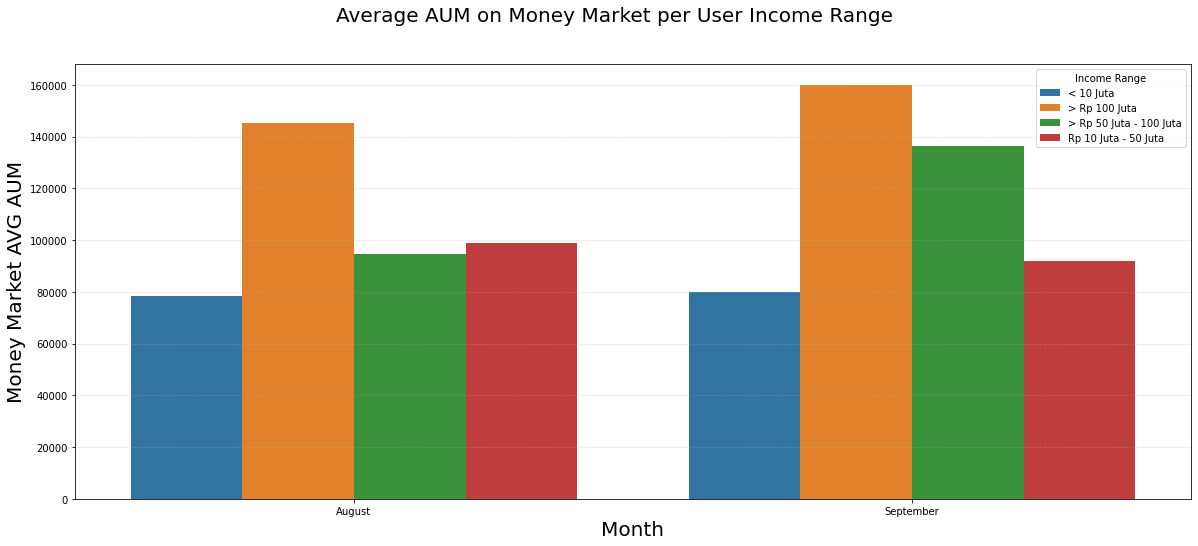

In [124]:
fig = plt.figure(figsize=(20, 8))

fig.suptitle('Average AUM on Money Market per User Income Range', fontsize=20)
plt.xlabel('Period', fontsize=20)
plt.ylabel('Average AUM', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.barplot(data=EDA_3b, x="Month", y="Money Market AVG AUM", hue="Income Range")
plt.savefig('AUM money.png', bbox_inches='tight')

#### 12.3.3 Average AUM Fixed Income

In [125]:
EDA_3c = df_monthly[['user_id','date','user_income_range','Pendapatan_Tetap_AUM']].copy()
EDA_3c

,user_id,date,user_income_range,Pendapatan_Tetap_AUM
0,3816789,2021-08-31,> Rp 50 Juta - 100 Juta,0
1,3816789,2021-09-30,> Rp 50 Juta - 100 Juta,270673
2,3802293,2021-09-30,> Rp 100 Juta,3229577
3,3049927,2021-09-30,< 10 Juta,49925
4,3836491,2021-09-30,< 10 Juta,0
...,...,...,...,...
7732,4072318,2021-09-30,> Rp 100 Juta,0
7733,3965617,2021-09-30,> Rp 100 Juta,680757
7734,3773859,2021-08-31,> Rp 100 Juta,180608
7735,3670811,2021-08-31,> Rp 50 Juta - 100 Juta,95075


In [126]:
EDA_3c = EDA_3c[EDA_3c['Pendapatan_Tetap_AUM']!=0]
EDA_3c['Month'] = EDA_3c['date'].dt.month_name()
EDA_3c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,date,user_income_range,Pendapatan_Tetap_AUM,Month
1,3816789,2021-09-30,> Rp 50 Juta - 100 Juta,270673,September
2,3802293,2021-09-30,> Rp 100 Juta,3229577,September
3,3049927,2021-09-30,< 10 Juta,49925,September
7,3820160,2021-08-31,> Rp 50 Juta - 100 Juta,95600,August
8,3820160,2021-09-30,> Rp 50 Juta - 100 Juta,145083,September
...,...,...,...,...,...
7725,4070628,2021-09-30,> Rp 50 Juta - 100 Juta,200125,September
7733,3965617,2021-09-30,> Rp 100 Juta,680757,September
7734,3773859,2021-08-31,> Rp 100 Juta,180608,August
7735,3670811,2021-08-31,> Rp 50 Juta - 100 Juta,95075,August


In [127]:
EDA_3c = EDA_3c.groupby(['Month','user_income_range'])['Pendapatan_Tetap_AUM'].agg('mean').reset_index()
EDA_3c.columns = ['Month','Income Range','Fixed Income AVG AUM']
EDA_3c

,Month,Income Range,Fixed Income AVG AUM
0,August,< 10 Juta,75983.262868
1,August,> Rp 100 Juta,169622.988506
2,August,> Rp 50 Juta - 100 Juta,109522.159204
3,August,Rp 10 Juta - 50 Juta,88112.304110
4,September,< 10 Juta,119520.020227
5,September,> Rp 100 Juta,354973.702128
6,September,> Rp 50 Juta - 100 Juta,215011.742115
7,September,Rp 10 Juta - 50 Juta,124494.498468


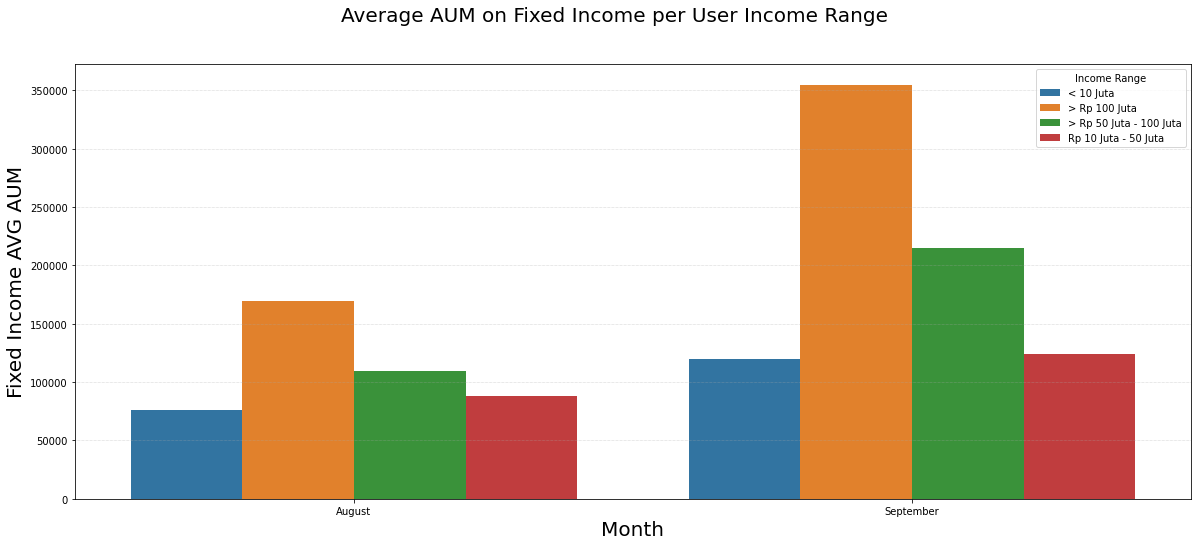

In [128]:
fig = plt.figure(figsize=(20, 8))

fig.suptitle('Average AUM on Fixed Income per User Income Range', fontsize=20)
plt.xlabel('Period', fontsize=20)
plt.ylabel('Average AUM', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.barplot(data=EDA_3c, x="Month", y="Fixed Income AVG AUM", hue="Income Range")
plt.savefig('AUM fixed.png', bbox_inches='tight')

#### 12.3.4 Average AUM Mixed Investment

In [129]:
EDA_3d = df_monthly[['user_id','date','user_income_range','Campuran_AUM']].copy()
EDA_3d

,user_id,date,user_income_range,Campuran_AUM
0,3816789,2021-08-31,> Rp 50 Juta - 100 Juta,0
1,3816789,2021-09-30,> Rp 50 Juta - 100 Juta,0
2,3802293,2021-09-30,> Rp 100 Juta,0
3,3049927,2021-09-30,< 10 Juta,910285
4,3836491,2021-09-30,< 10 Juta,0
...,...,...,...,...
7732,4072318,2021-09-30,> Rp 100 Juta,982533
7733,3965617,2021-09-30,> Rp 100 Juta,0
7734,3773859,2021-08-31,> Rp 100 Juta,0
7735,3670811,2021-08-31,> Rp 50 Juta - 100 Juta,0


In [130]:
EDA_3d = EDA_3d[EDA_3d['Campuran_AUM']!=0]
EDA_3d['Month'] = EDA_3d['date'].dt.month_name()
EDA_3d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,date,user_income_range,Campuran_AUM,Month
3,3049927,2021-09-30,< 10 Juta,910285,September
26,3852426,2021-09-30,> Rp 50 Juta - 100 Juta,9904769,September
40,3748704,2021-08-31,Rp 10 Juta - 50 Juta,1938796,August
41,3748704,2021-09-30,Rp 10 Juta - 50 Juta,1888771,September
81,3787804,2021-09-30,> Rp 50 Juta - 100 Juta,5226798,September
...,...,...,...,...,...
7644,2159653,2021-09-30,> Rp 100 Juta,10024942,September
7704,3744392,2021-08-31,Rp 10 Juta - 50 Juta,199436,August
7705,3744392,2021-09-30,Rp 10 Juta - 50 Juta,200610,September
7730,4074036,2021-09-30,> Rp 100 Juta,24776171,September


In [131]:
EDA_3d = EDA_3d.groupby(['Month','user_income_range'])['Campuran_AUM'].agg('mean').reset_index()
EDA_3d.columns = ['Month','Income Range','Mixed Inv AVG AUM']
EDA_3d

,Month,Income Range,Mixed Inv AVG AUM
0,August,< 10 Juta,1.729997e+06
1,August,> Rp 100 Juta,5.797960e+06
2,August,> Rp 50 Juta - 100 Juta,4.679934e+06
3,August,Rp 10 Juta - 50 Juta,3.811358e+06
4,September,< 10 Juta,1.504864e+06
5,September,> Rp 100 Juta,6.448584e+06
6,September,> Rp 50 Juta - 100 Juta,2.666818e+06
7,September,Rp 10 Juta - 50 Juta,2.556141e+06


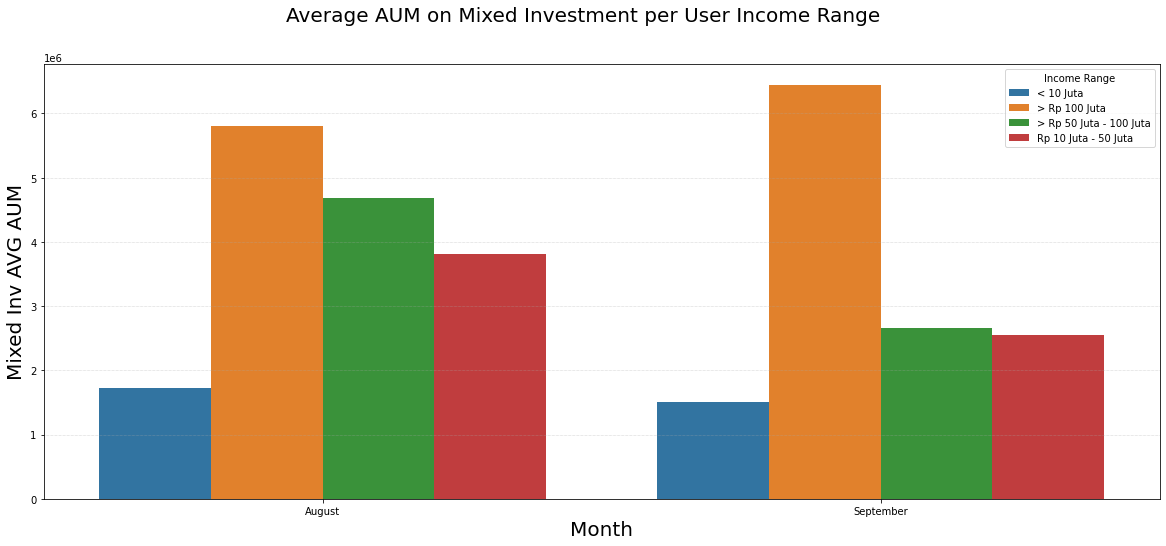

In [132]:
fig = plt.figure(figsize=(20, 8))

fig.suptitle('Average AUM on Mixed Investment per User Income Range', fontsize=20)
plt.xlabel('Period', fontsize=20)
plt.ylabel('Average AUM', fontsize=20)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)

sns.barplot(data=EDA_3d, x="Month", y="Mixed Inv AVG AUM", hue="Income Range")
plt.savefig('AUM mixed.png', bbox_inches='tight')

#### 12.3.5 Average AUM All Products

In [133]:
EDA_3all = df_monthly[['date','Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']].copy()
EDA_3all['Month'] = EDA_3all['date'].dt.month_name()
EDA_3all

,date,Saham_AUM,Pasar_Uang_AUM,Pendapatan_Tetap_AUM,Campuran_AUM,Month
0,2021-08-31,186071,40090,0,0,August
1,2021-09-30,297141,40235,270673,0,September
2,2021-09-30,0,0,3229577,0,September
3,2021-09-30,41545,9997,49925,910285,September
4,2021-09-30,0,10012,0,0,September
...,...,...,...,...,...,...
7732,2021-09-30,0,500465,0,982533,September
7733,2021-09-30,0,200587,680757,0,September
7734,2021-08-31,183353,40042,180608,0,August
7735,2021-08-31,106802,130285,95075,0,August


In [134]:
EDA_3all = EDA_3all.groupby('Month')[['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']].agg('mean').reset_index()
EDA_3all.columns = ['Month','Stocks','Money Market','Fixed Income','Mixed']
EDA_3all

,Month,Stocks,Money Market,Fixed Income,Mixed
0,August,121959.328708,74717.506938,47817.450130,154103.323070
1,September,82897.929479,75818.677223,86340.822685,108268.009943


In [135]:
EDA_3tf = EDA_3all.copy()
EDA_3tf = EDA_3tf.melt('Month', var_name='column', value_name='value')
EDA_3tf

,Month,column,value
0,August,Stocks,121959.328708
1,September,Stocks,82897.929479
2,August,Money Market,74717.506938
3,September,Money Market,75818.677223
4,August,Fixed Income,47817.450130
5,September,Fixed Income,86340.822685
6,August,Mixed,154103.323070
7,September,Mixed,108268.009943


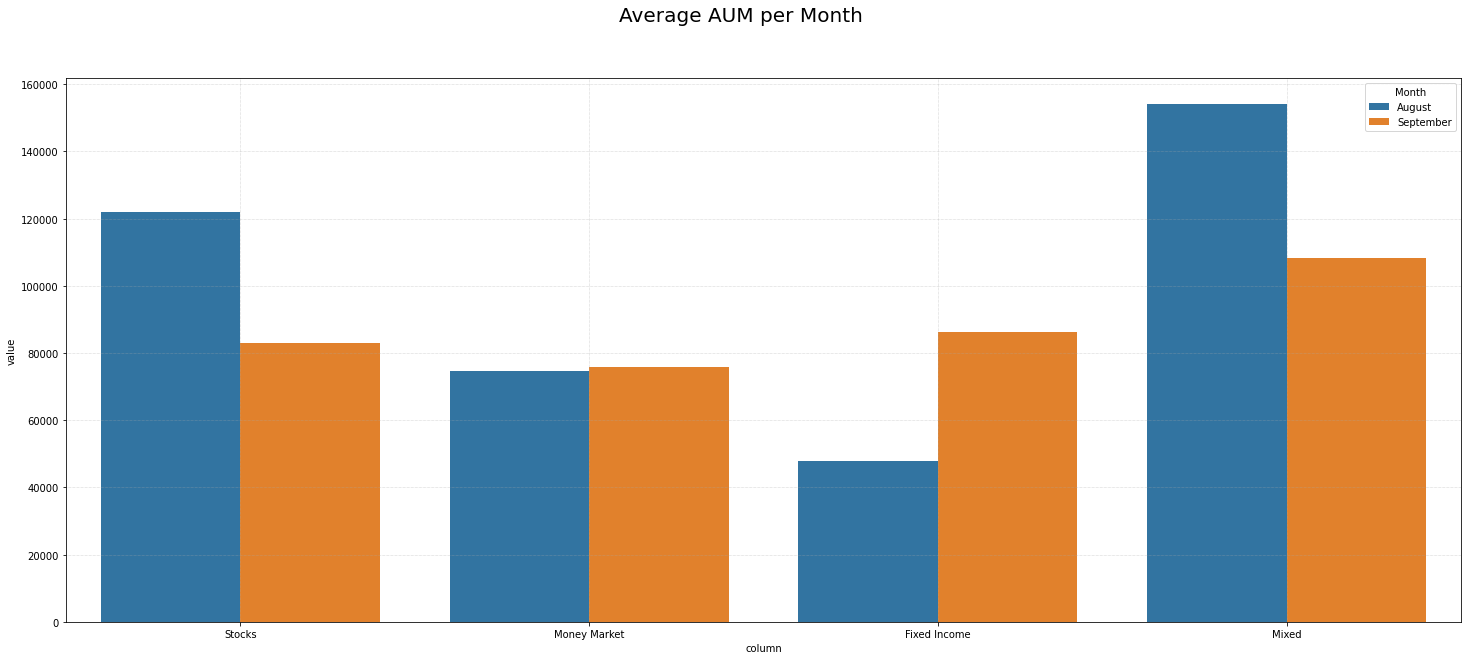

In [136]:
# create the visualization of the data
fig = plt.figure(figsize=(25, 10)) #to set the figure size

fig.suptitle('Average AUM per Month', fontsize=20) # to set the chart title and its font size
sns.barplot(data = EDA_3tf, x = 'column', y = 'value', hue = 'Month')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.savefig('avg AUM per mth.png', bbox_inches='tight')

**Summary Insight**

Users investing in money market and fixed income investment have a larger amount of AUM at the end of September. While users investing in stocks have a larger amount of AUM at the end August.

Users having the most AUM amount are super rich people, but maybe that is due to their huge amount of investment.

### 12.6 Average Profit at the End of Period

In [137]:
EDA_4 = df_monthly[['date','Saham_profit','PasarUang_profit','FixedIncome_profit','Campuran_profit']].copy()
EDA_4['Month'] = EDA_4['date'].dt.month_name()
EDA_4

,date,Saham_profit,PasarUang_profit,FixedIncome_profit,Campuran_profit,Month
0,2021-08-31,-3929,90,0,0,August
1,2021-09-30,7141,235,673,0,September
2,2021-09-30,0,0,-423,0,September
3,2021-09-30,1545,-3,-75,11285,September
4,2021-09-30,0,12,0,0,September
...,...,...,...,...,...,...
7732,2021-09-30,0,465,0,-17467,September
7733,2021-09-30,0,587,757,0,September
7734,2021-08-31,3353,42,608,0,August
7735,2021-08-31,-3198,285,75,0,August


In [138]:
EDA_4 = EDA_4.groupby('Month')[['Saham_profit','PasarUang_profit','FixedIncome_profit','Campuran_profit']].agg('mean').reset_index()
EDA_4.columns = ['Month','Stocks','Money Market','Fixed Income','Mixed Investment']
EDA_4

,Month,Stocks,Money Market,Fixed Income,Mixed Investment
0,August,1081.708153,90.978317,174.818300,-968.742845
1,September,2459.566746,112.911434,3.265881,-961.860983


In [139]:
EDA_4tf = EDA_4.copy()
EDA_4tf = EDA_4tf.melt('Month', var_name='column', value_name='value')
EDA_4tf

,Month,column,value
0,August,Stocks,1081.708153
1,September,Stocks,2459.566746
2,August,Money Market,90.978317
3,September,Money Market,112.911434
4,August,Fixed Income,174.818300
5,September,Fixed Income,3.265881
6,August,Mixed Investment,-968.742845
7,September,Mixed Investment,-961.860983


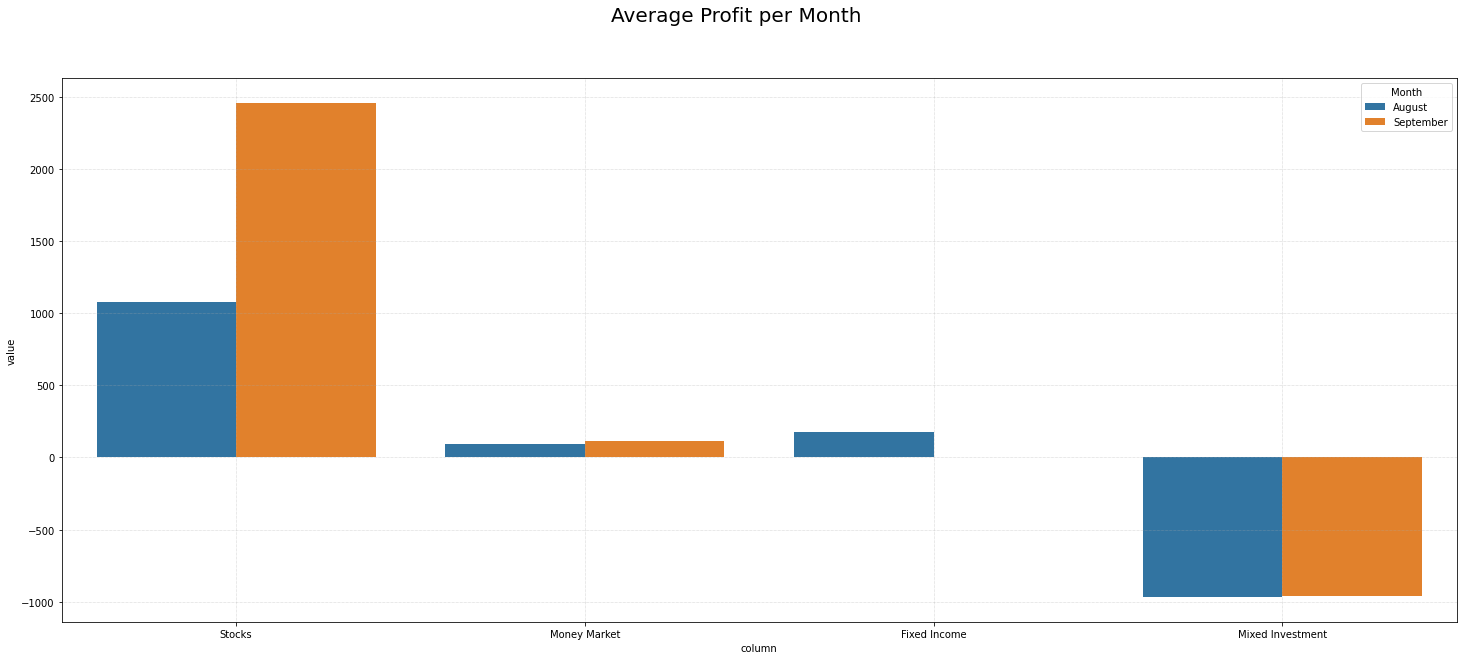

In [140]:
# create the visualization of the data
fig = plt.figure(figsize=(25, 10)) #to set the figure size

fig.suptitle('Average Profit per Month', fontsize=20) # to set the chart title and its font size
sns.barplot(data = EDA_4tf, x = 'column', y = 'value', hue = 'Month')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.savefig('avg profit.png', bbox_inches='tight')

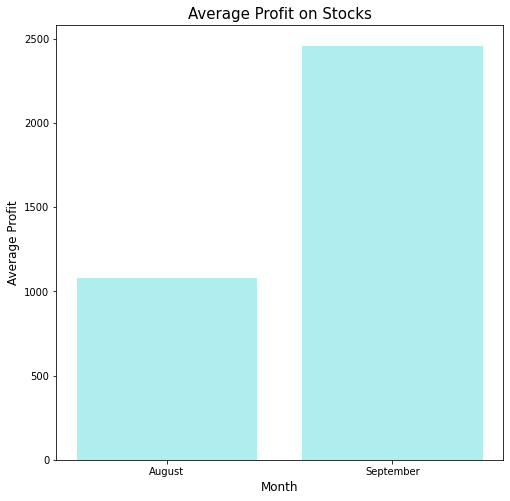

In [141]:
# Create viz for Stocks
x = EDA_4['Month']
y = EDA_4['Stocks']

# configure the chart
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(x, y, color='paleturquoise')
plt.xlabel('Month', size=12)
plt.ylabel('Average Profit', size=12)
plt.title('Average Profit on Stocks', size=15)
plt.savefig('profit stocks.png', bbox_inches='tight')

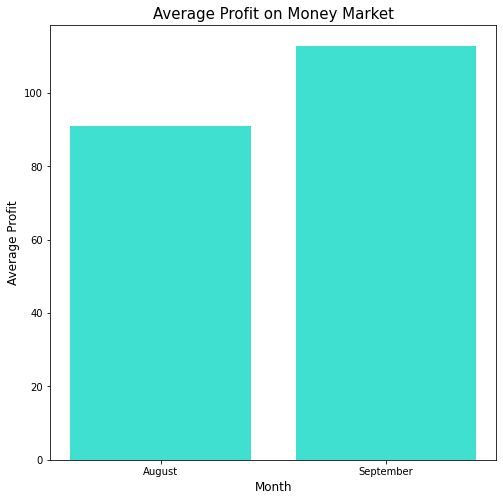

In [142]:
# Create viz for Money Market
x = EDA_4['Month']
y = EDA_4['Money Market']

# configure the chart
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(x, y, color='turquoise')
plt.xlabel('Month', size=12)
plt.ylabel('Average Profit', size=12)
plt.title('Average Profit on Money Market', size=15)
plt.savefig('profit money.png', bbox_inches='tight')

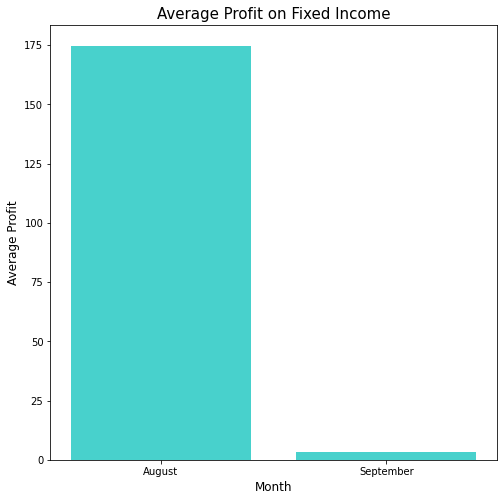

In [143]:
# Create viz for Fixed Income
x = EDA_4['Month']
y = EDA_4['Fixed Income']

# configure the chart
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(x, y, color='mediumturquoise')
plt.xlabel('Month', size=12)
plt.ylabel('Average Profit', size=12)
plt.title('Average Profit on Fixed Income', size=15)
plt.savefig('profit fixed.png', bbox_inches='tight')

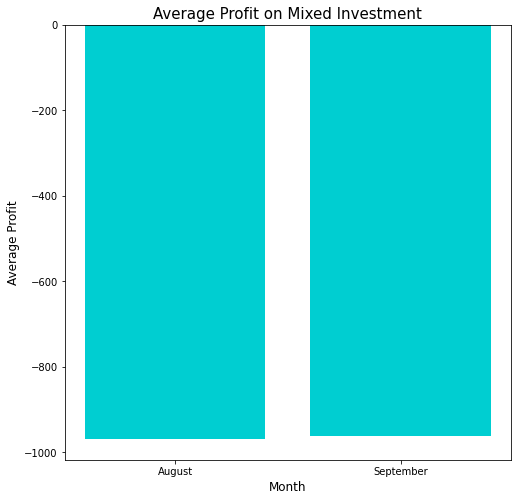

In [144]:
# Create viz for Fixed Income
x = EDA_4['Month']
y = EDA_4['Mixed Investment']

# configure the chart
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(x, y, color='darkturquoise')
plt.xlabel('Month', size=12)
plt.ylabel('Average Profit', size=12)
plt.title('Average Profit on Mixed Investment', size=15)
plt.savefig('profit mixed.png', bbox_inches='tight')

**Summary Insight**

Users investing in stocks and money market gained larger profit in September, while profit from fixed income dropped significantly in September.

Meanwhile users investing in mixed investment doesn't gain profit.

## **Summary of Insights for Segmentation**##

From the EDA, we can give an insight to target 3 customer groups, which are:
*  Users from middle class income (below Rp 10 million to Rp 50 million).
*  Students and corporate employees, because our users are mostly consisting from those groups.
*  Users whose investing in fixed income products. Government bond is similar to bonds, therefore we can target our new customers to those who are familiar with bonds' risks and characteristics.


# **Milestone 2**

Clustering users to give recommendation of types of users to be targeted.

## **1. Import Library**

In [145]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler 
from sklearn import cluster   
from yellowbrick.cluster import SilhouetteVisualizer                  

## **2. Import Datasets**

In [146]:
base = df_monthly.copy()
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7737 entries, 0 to 7736
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           7737 non-null   object        
 1   registration_import_datetime      7737 non-null   datetime64[ns]
 2   user_gender                       7737 non-null   object        
 3   user_age                          7737 non-null   int64         
 4   user_occupation                   7737 non-null   object        
 5   user_income_range                 7737 non-null   object        
 6   referral_code_used                7737 non-null   object        
 7   user_income_source                7737 non-null   object        
 8   date                              7737 non-null   datetime64[ns]
 9   Saham_AUM                         7737 non-null   int64         
 10  Saham_invested_amount             7737 non-null 

Drop unnecessary columns:

In [147]:
drop_col = ['user_income_source','registration_import_datetime','Saham_AUM', 'Saham_invested_amount','Saham_Count',
       'Pasar_Uang_AUM','Pasar_Uang_invested_amount','PasarUang_Count','Pendapatan_Tetap_AUM',
       'Pendapatan_Tetap_invested_amount','FixedIncome_Count', 'Campuran_AUM',
       'Campuran_invested_amount','Mixed_Count',
       'Saham_profit', 'PasarUang_profit', 'FixedIncome_profit',
       'Campuran_profit','Saham_Buy', 'PasarUang_Buy',
       'FixedInc_Buy', 'Mixed_Buy', 'Saham_Sell', 'PasarUang_Sell',
       'FixedInc_Sell', 'Mixed_Sell']
base.drop(columns = drop_col, inplace = True)
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7737 entries, 0 to 7736
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                7737 non-null   object        
 1   user_gender            7737 non-null   object        
 2   user_age               7737 non-null   int64         
 3   user_occupation        7737 non-null   object        
 4   user_income_range      7737 non-null   object        
 5   referral_code_used     7737 non-null   object        
 6   date                   7737 non-null   datetime64[ns]
 7   Saham_Total_Trx        7737 non-null   int64         
 8   Saham_Total_Count      7737 non-null   int64         
 9   PasarUang_Total_Trx    7737 non-null   int64         
 10  PasarUang_Total_Count  7737 non-null   int64         
 11  FixedInc_Total_Trx     7737 non-null   int64         
 12  FixedInc_Total_Count   7737 non-null   int64         
 13  Cam

In [148]:
base = base.loc[(base['date'] == '2021-09-30')] # Select only data in 30 September 2021.
base

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,PasarUang_Total_Count,FixedInc_Total_Trx,FixedInc_Total_Count,Campuran_Total_Trx,Mixed_Total_Count
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,2021-09-30,100000,1,0,0,0,0,0,0.0
2,3802293,Female,47,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,0,2030000,2,0,0.0
3,3049927,Male,53,Swasta,< 10 Juta,did not use,2021-09-30,0,0,0,0,0,0,149000,1.0
4,3836491,Male,59,Others,< 10 Juta,used referral,2021-09-30,0,0,0,0,0,0,0,0.0
6,3718933,Male,50,Pengusaha,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,4074036,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0
7731,3973310,Male,49,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,0,0,0,0,0.0
7732,4072318,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0
7733,3965617,Female,49,IRT,> Rp 100 Juta,did not use,2021-09-30,0,0,100000,1,340000,1,0,0.0


In [149]:
base.loc[:,'Total_Trx_Amt'] = base['Saham_Total_Trx'] + base['PasarUang_Total_Trx'] + base['FixedInc_Total_Trx'] + base['Campuran_Total_Trx']
base.loc[:,'Total_Trx_Count'] = base['Saham_Total_Count'] + base['PasarUang_Total_Count'] + base['FixedInc_Total_Count'] + base['Mixed_Total_Count']
base

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,PasarUang_Total_Count,FixedInc_Total_Trx,FixedInc_Total_Count,Campuran_Total_Trx,Mixed_Total_Count,Total_Trx_Amt,Total_Trx_Count
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,2021-09-30,100000,1,0,0,0,0,0,0.0,100000,1.0
2,3802293,Female,47,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,0,2030000,2,0,0.0,2030000,2.0
3,3049927,Male,53,Swasta,< 10 Juta,did not use,2021-09-30,0,0,0,0,0,0,149000,1.0,149000,1.0
4,3836491,Male,59,Others,< 10 Juta,used referral,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0
6,3718933,Male,50,Pengusaha,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,4074036,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0
7731,3973310,Male,49,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0
7732,4072318,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0
7733,3965617,Female,49,IRT,> Rp 100 Juta,did not use,2021-09-30,0,0,100000,1,340000,1,0,0.0,440000,2.0


In [150]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5431 entries, 1 to 7736
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                5431 non-null   object        
 1   user_gender            5431 non-null   object        
 2   user_age               5431 non-null   int64         
 3   user_occupation        5431 non-null   object        
 4   user_income_range      5431 non-null   object        
 5   referral_code_used     5431 non-null   object        
 6   date                   5431 non-null   datetime64[ns]
 7   Saham_Total_Trx        5431 non-null   int64         
 8   Saham_Total_Count      5431 non-null   int64         
 9   PasarUang_Total_Trx    5431 non-null   int64         
 10  PasarUang_Total_Count  5431 non-null   int64         
 11  FixedInc_Total_Trx     5431 non-null   int64         
 12  FixedInc_Total_Count   5431 non-null   int64         
 13  Cam

In [151]:
base[base['user_id'].duplicated()] # To check for duplicates in user_id

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,PasarUang_Total_Count,FixedInc_Total_Trx,FixedInc_Total_Count,Campuran_Total_Trx,Mixed_Total_Count,Total_Trx_Amt,Total_Trx_Count


No missing values & duplicates User ID.

## **3. Check for Outliers**

In [152]:
num_column = ['user_age','Total_Trx_Amt','Total_Trx_Count']
print(num_column)

['user_age', 'Total_Trx_Amt', 'Total_Trx_Count']


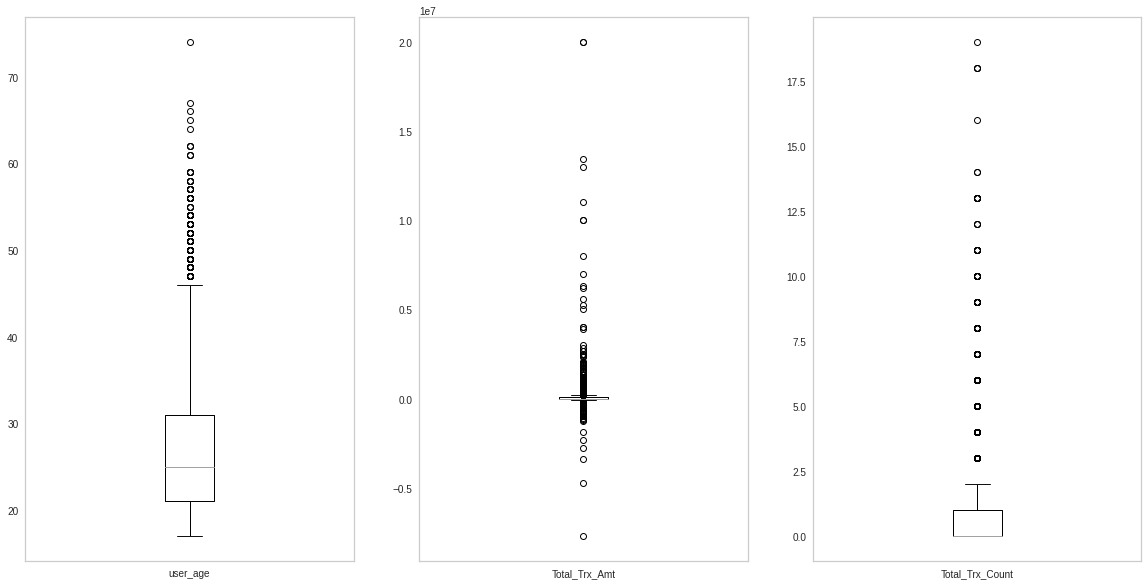

In [153]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,10))
for i,el in enumerate(num_column):
    a = base.boxplot(el, ax=axes.flatten()[i],grid=False)
plt.show()

Each column have their own outliers.

*  There is one user who is more than 70 years old.
*  Total transactions amount less than -Rp 5,000,000 and more than Rp 15,000,000
*  Total transactions count more than 15.

We decided to remove these outliers so we can result a proper segmentation.

In [154]:
df_out = base.copy()
df_out = df_out[(df_out['user_age'] < 70)]
df_out = df_out[(df_out['Total_Trx_Amt'] > -5000000)]
df_out = df_out[(df_out['Total_Trx_Amt'] < 15000000)]
df_out = df_out[(df_out['Total_Trx_Count'] < 15)]
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 1 to 7736
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                5422 non-null   object        
 1   user_gender            5422 non-null   object        
 2   user_age               5422 non-null   int64         
 3   user_occupation        5422 non-null   object        
 4   user_income_range      5422 non-null   object        
 5   referral_code_used     5422 non-null   object        
 6   date                   5422 non-null   datetime64[ns]
 7   Saham_Total_Trx        5422 non-null   int64         
 8   Saham_Total_Count      5422 non-null   int64         
 9   PasarUang_Total_Trx    5422 non-null   int64         
 10  PasarUang_Total_Count  5422 non-null   int64         
 11  FixedInc_Total_Trx     5422 non-null   int64         
 12  FixedInc_Total_Count   5422 non-null   int64         
 13  Cam

We have removed 9 rows of data from 5,431 original data.

## **4. EDA**

In [155]:
desc = df_out[num_column].describe()
desc = round(desc, 2)
desc

,user_age,Total_Trx_Amt,Total_Trx_Count
count,5422.00,5422.00,5422.00
mean,27.48,86645.15,1.02
std,8.38,487167.32,1.77
min,17.00,-4723835.00,0.00
25%,21.00,0.00,0.00
50%,25.00,0.00,0.00
75%,31.00,70000.00,1.00
max,67.00,13420000.00,14.00


In [156]:
df_out[['user_gender','user_occupation','user_income_range','referral_code_used']].describe()

,user_gender,user_occupation,user_income_range,referral_code_used
count,5422,5422,5422,5422
unique,2,5,4,2
top,Male,Pelajar,< 10 Juta,did not use
freq,3197,2920,2312,3847


**Data overview:**
*  There are 5,422 data.
*  Average age of our users is 27 years old.
*  Most of our users are male students with income below Rp 10 million.
*  Most of our users did not user referral code.

##**5. Encode Category Data**

1.  Gender = one hot encoding
2.  Age range / Generation = label
3.  Occupation = label
4.  Income range = label
5.  Referral code = label

In [157]:
df_cluster = df_out.copy()
df_cluster.head()

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,PasarUang_Total_Count,FixedInc_Total_Trx,FixedInc_Total_Count,Campuran_Total_Trx,Mixed_Total_Count,Total_Trx_Amt,Total_Trx_Count
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,2021-09-30,100000,1,0,0,0,0,0,0.0,100000,1.0
2,3802293,Female,47,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,0,2030000,2,0,0.0,2030000,2.0
3,3049927,Male,53,Swasta,< 10 Juta,did not use,2021-09-30,0,0,0,0,0,0,149000,1.0,149000,1.0
4,3836491,Male,59,Others,< 10 Juta,used referral,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0
6,3718933,Male,50,Pengusaha,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0


### One Hot Encoding Gender column

Using One-Hot because consists of only 2 types of value, female or male.

In [158]:
dum_gender = pd.get_dummies(df_cluster, columns=['user_gender'], prefix=['user_gender'])
df_cluster = df_cluster.merge(dum_gender)
df_cluster

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,PasarUang_Total_Count,FixedInc_Total_Trx,FixedInc_Total_Count,Campuran_Total_Trx,Mixed_Total_Count,Total_Trx_Amt,Total_Trx_Count,user_gender_Female,user_gender_Male
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,2021-09-30,100000,1,0,0,0,0,0,0.0,100000,1.0,1,0
1,3802293,Female,47,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,0,2030000,2,0,0.0,2030000,2.0,1,0
2,3049927,Male,53,Swasta,< 10 Juta,did not use,2021-09-30,0,0,0,0,0,0,149000,1.0,149000,1.0,0,1
3,3836491,Male,59,Others,< 10 Juta,used referral,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0,0,1
4,3718933,Male,50,Pengusaha,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4074036,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0,0,1
5418,3973310,Male,49,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0,0,1
5419,4072318,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0,0,1
5420,3965617,Female,49,IRT,> Rp 100 Juta,did not use,2021-09-30,0,0,100000,1,340000,1,0,0.0,440000,2.0,1,0


### Label Encoding User Age Column

In [159]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                5422 non-null   object        
 1   user_gender            5422 non-null   object        
 2   user_age               5422 non-null   int64         
 3   user_occupation        5422 non-null   object        
 4   user_income_range      5422 non-null   object        
 5   referral_code_used     5422 non-null   object        
 6   date                   5422 non-null   datetime64[ns]
 7   Saham_Total_Trx        5422 non-null   int64         
 8   Saham_Total_Count      5422 non-null   int64         
 9   PasarUang_Total_Trx    5422 non-null   int64         
 10  PasarUang_Total_Count  5422 non-null   int64         
 11  FixedInc_Total_Trx     5422 non-null   int64         
 12  FixedInc_Total_Count   5422 non-null   int64         
 13  Cam

In [160]:
bins= [20,30,40,50,60,100]
labels = ['Under 20s','20-30 years','31-40 years','41-50','Above 50s']
df_cluster['age_group'] = pd.cut(df_cluster['user_age'], bins=bins, labels=labels, right=False)
df_cluster

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,PasarUang_Total_Count,FixedInc_Total_Trx,FixedInc_Total_Count,Campuran_Total_Trx,Mixed_Total_Count,Total_Trx_Amt,Total_Trx_Count,user_gender_Female,user_gender_Male,age_group
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,2021-09-30,100000,1,0,0,0,0,0,0.0,100000,1.0,1,0,41-50
1,3802293,Female,47,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,0,2030000,2,0,0.0,2030000,2.0,1,0,31-40 years
2,3049927,Male,53,Swasta,< 10 Juta,did not use,2021-09-30,0,0,0,0,0,0,149000,1.0,149000,1.0,0,1,41-50
3,3836491,Male,59,Others,< 10 Juta,used referral,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0,0,1,41-50
4,3718933,Male,50,Pengusaha,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0,0,1,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4074036,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0,0,1,31-40 years
5418,3973310,Male,49,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0,0,1,31-40 years
5419,4072318,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,0,0,0,0,0.0,0,0.0,0,1,31-40 years
5420,3965617,Female,49,IRT,> Rp 100 Juta,did not use,2021-09-30,0,0,100000,1,340000,1,0,0.0,440000,2.0,1,0,31-40 years


In [161]:
df_cluster['age_groupnum'] = df_cluster['age_group'].astype('category')
df_cluster['age_groupnum'] = df_cluster['age_group'].cat.set_categories(['Under 20s','20-30 years','31-40 years','41-50','Above 50s'], ordered=True)
df_cluster['age_groupnum'] = df_cluster['age_group'].cat.codes
df_cluster

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,...,FixedInc_Total_Trx,FixedInc_Total_Count,Campuran_Total_Trx,Mixed_Total_Count,Total_Trx_Amt,Total_Trx_Count,user_gender_Female,user_gender_Male,age_group,age_groupnum
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,2021-09-30,100000,1,0,...,0,0,0,0.0,100000,1.0,1,0,41-50,3
1,3802293,Female,47,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,...,2030000,2,0,0.0,2030000,2.0,1,0,31-40 years,2
2,3049927,Male,53,Swasta,< 10 Juta,did not use,2021-09-30,0,0,0,...,0,0,149000,1.0,149000,1.0,0,1,41-50,3
3,3836491,Male,59,Others,< 10 Juta,used referral,2021-09-30,0,0,0,...,0,0,0,0.0,0,0.0,0,1,41-50,3
4,3718933,Male,50,Pengusaha,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,0,0,0,0.0,0,0.0,0,1,41-50,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4074036,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,0,0,0,0.0,0,0.0,0,1,31-40 years,2
5418,3973310,Male,49,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,...,0,0,0,0.0,0,0.0,0,1,31-40 years,2
5419,4072318,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,0,0,0,0.0,0,0.0,0,1,31-40 years,2
5420,3965617,Female,49,IRT,> Rp 100 Juta,did not use,2021-09-30,0,0,100000,...,340000,1,0,0.0,440000,2.0,1,0,31-40 years,2


### One Hot Encoding Occupation Column

In [162]:
dum_occ = pd.get_dummies(df_cluster, columns=['user_occupation'], prefix=['user_occupation'])
df_cluster = df_cluster.merge(dum_occ)
df_cluster

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,...,Total_Trx_Count,user_gender_Female,user_gender_Male,age_group,age_groupnum,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,2021-09-30,100000,1,0,...,1.0,1,0,41-50,3,1,0,0,0,0
1,3802293,Female,47,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,...,2.0,1,0,31-40 years,2,0,1,0,0,0
2,3049927,Male,53,Swasta,< 10 Juta,did not use,2021-09-30,0,0,0,...,1.0,0,1,41-50,3,0,0,0,0,1
3,3836491,Male,59,Others,< 10 Juta,used referral,2021-09-30,0,0,0,...,0.0,0,1,41-50,3,0,1,0,0,0
4,3718933,Male,50,Pengusaha,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,0.0,0,1,41-50,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4074036,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,0.0,0,1,31-40 years,2,0,0,0,0,1
5418,3973310,Male,49,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,...,0.0,0,1,31-40 years,2,0,1,0,0,0
5419,4072318,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,0.0,0,1,31-40 years,2,0,0,0,0,1
5420,3965617,Female,49,IRT,> Rp 100 Juta,did not use,2021-09-30,0,0,100000,...,2.0,1,0,31-40 years,2,1,0,0,0,0


### Label Encoding User Income Range Column

In [163]:
df_cluster['user_income_range'].unique()

array(['> Rp 50 Juta - 100 Juta', '> Rp 100 Juta', '< 10 Juta',
       'Rp 10 Juta - 50 Juta'], dtype=object)

In [164]:
df_cluster['user_income_range'] = df_cluster['user_income_range'].astype('category')
df_cluster['income_range'] = df_cluster['user_income_range'].cat.set_categories(["< 10 Juta", "Rp 10 Juta - 50 Juta", "> Rp 50 Juta - 100 Juta","> Rp 100 Juta"], ordered=True)
df_cluster['income_range'] = df_cluster['income_range'].cat.codes
df_cluster

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,...,user_gender_Female,user_gender_Male,age_group,age_groupnum,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,income_range
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,2021-09-30,100000,1,0,...,1,0,41-50,3,1,0,0,0,0,2
1,3802293,Female,47,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,...,1,0,31-40 years,2,0,1,0,0,0,3
2,3049927,Male,53,Swasta,< 10 Juta,did not use,2021-09-30,0,0,0,...,0,1,41-50,3,0,0,0,0,1,0
3,3836491,Male,59,Others,< 10 Juta,used referral,2021-09-30,0,0,0,...,0,1,41-50,3,0,1,0,0,0,0
4,3718933,Male,50,Pengusaha,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,0,1,41-50,3,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4074036,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,0,1,31-40 years,2,0,0,0,0,1,3
5418,3973310,Male,49,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,...,0,1,31-40 years,2,0,1,0,0,0,3
5419,4072318,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,0,1,31-40 years,2,0,0,0,0,1,3
5420,3965617,Female,49,IRT,> Rp 100 Juta,did not use,2021-09-30,0,0,100000,...,1,0,31-40 years,2,1,0,0,0,0,3


### One Hot Encoding Referral Code Column


In [165]:
dum_ref_code = pd.get_dummies(df_cluster, columns=['referral_code_used'], prefix=['referral_code_used'])
df_cluster = df_cluster.merge(dum_ref_code)
df_cluster

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,...,age_group,age_groupnum,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,income_range,referral_code_used_did not use,referral_code_used_used referral
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,did not use,2021-09-30,100000,1,0,...,41-50,3,1,0,0,0,0,2,1,0
1,3802293,Female,47,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,...,31-40 years,2,0,1,0,0,0,3,0,1
2,3049927,Male,53,Swasta,< 10 Juta,did not use,2021-09-30,0,0,0,...,41-50,3,0,0,0,0,1,0,1,0
3,3836491,Male,59,Others,< 10 Juta,used referral,2021-09-30,0,0,0,...,41-50,3,0,1,0,0,0,0,0,1
4,3718933,Male,50,Pengusaha,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,41-50,3,0,0,0,1,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4074036,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,31-40 years,2,0,0,0,0,1,3,1,0
5418,3973310,Male,49,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,...,31-40 years,2,0,1,0,0,0,3,0,1
5419,4072318,Male,49,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,31-40 years,2,0,0,0,0,1,3,1,0
5420,3965617,Female,49,IRT,> Rp 100 Juta,did not use,2021-09-30,0,0,100000,...,31-40 years,2,1,0,0,0,0,3,1,0


In [166]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           5422 non-null   object        
 1   user_gender                       5422 non-null   object        
 2   user_age                          5422 non-null   int64         
 3   user_occupation                   5422 non-null   object        
 4   user_income_range                 5422 non-null   category      
 5   referral_code_used                5422 non-null   object        
 6   date                              5422 non-null   datetime64[ns]
 7   Saham_Total_Trx                   5422 non-null   int64         
 8   Saham_Total_Count                 5422 non-null   int64         
 9   PasarUang_Total_Trx               5422 non-null   int64         
 10  PasarUang_Total_Count             5422 non-null 

## **6. Data Transformation**

Because we are using data with a huge range of amount, we need to transform the data first.

In [167]:
df_scale = df_cluster.copy()

In [168]:
scaler = MinMaxScaler()
df_scale[num_column] = scaler.fit_transform(df_scale[num_column])
df_scale

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,date,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,...,age_group,age_groupnum,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,income_range,referral_code_used_did not use,referral_code_used_used referral
0,3816789,Female,0.72,IRT,> Rp 50 Juta - 100 Juta,did not use,2021-09-30,100000,1,0,...,41-50,3,1,0,0,0,0,2,1,0
1,3802293,Female,0.60,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,...,31-40 years,2,0,1,0,0,0,3,0,1
2,3049927,Male,0.72,Swasta,< 10 Juta,did not use,2021-09-30,0,0,0,...,41-50,3,0,0,0,0,1,0,1,0
3,3836491,Male,0.84,Others,< 10 Juta,used referral,2021-09-30,0,0,0,...,41-50,3,0,1,0,0,0,0,0,1
4,3718933,Male,0.66,Pengusaha,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,41-50,3,0,0,0,1,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4074036,Male,0.64,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,31-40 years,2,0,0,0,0,1,3,1,0
5418,3973310,Male,0.64,Others,> Rp 100 Juta,used referral,2021-09-30,0,0,0,...,31-40 years,2,0,1,0,0,0,3,0,1
5419,4072318,Male,0.64,Swasta,> Rp 100 Juta,did not use,2021-09-30,0,0,0,...,31-40 years,2,0,0,0,0,1,3,1,0
5420,3965617,Female,0.64,IRT,> Rp 100 Juta,did not use,2021-09-30,0,0,100000,...,31-40 years,2,1,0,0,0,0,3,1,0


## **7. Clusters Breakdown**

In [169]:
df_scale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           5422 non-null   object        
 1   user_gender                       5422 non-null   object        
 2   user_age                          5422 non-null   float64       
 3   user_occupation                   5422 non-null   object        
 4   user_income_range                 5422 non-null   category      
 5   referral_code_used                5422 non-null   object        
 6   date                              5422 non-null   datetime64[ns]
 7   Saham_Total_Trx                   5422 non-null   int64         
 8   Saham_Total_Count                 5422 non-null   int64         
 9   PasarUang_Total_Trx               5422 non-null   int64         
 10  PasarUang_Total_Count             5422 non-null 

In [170]:
df_cust = df_scale[['user_age','Total_Trx_Amt','Total_Trx_Count',
                    'user_gender_Female','user_gender_Male',
                    'age_groupnum','user_occupation_IRT',
                    'user_occupation_Others','user_occupation_Pelajar',
                    'user_occupation_Pengusaha','user_occupation_Swasta','income_range',
                    'referral_code_used_did not use','referral_code_used_used referral']].copy()
df_cust

,user_age,Total_Trx_Amt,Total_Trx_Count,user_gender_Female,user_gender_Male,age_groupnum,user_occupation_IRT,user_occupation_Others,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,income_range,referral_code_used_did not use,referral_code_used_used referral
0,0.72,0.265866,0.071429,1,0,3,1,0,0,0,0,2,1,0
1,0.60,0.372239,0.142857,1,0,2,0,1,0,0,0,3,0,1
2,0.72,0.268567,0.071429,0,1,3,0,0,0,0,1,0,1,0
3,0.84,0.260355,0.000000,0,1,3,0,1,0,0,0,0,0,1
4,0.66,0.260355,0.000000,0,1,3,0,0,0,1,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,0.64,0.260355,0.000000,0,1,2,0,0,0,0,1,3,1,0
5418,0.64,0.260355,0.000000,0,1,2,0,1,0,0,0,3,0,1
5419,0.64,0.260355,0.000000,0,1,2,0,0,0,0,1,3,1,0
5420,0.64,0.284605,0.142857,1,0,2,1,0,0,0,0,3,1,0


### Elbow Method

1 17750.549261634573
2 12511.718022239047
3 10741.664923861685
4 9389.35491126329
5 8488.911451617301
6 7719.449256068514
7 7147.104514659395
8 6804.38130161628
9 6453.064393735373
10 6096.583401809673


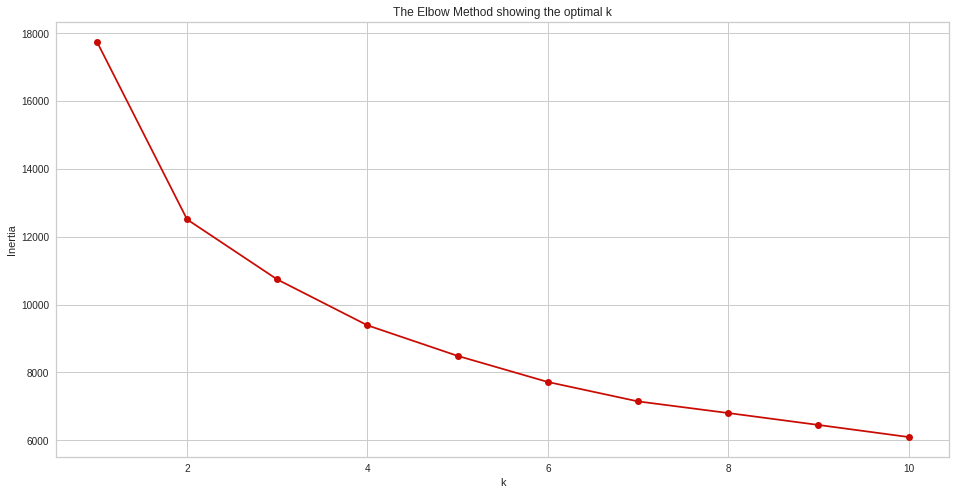

In [171]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_cust)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'ro-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhouette Method

For k=2, the average silhouette score is 0.2920742708048025
For k=3, the average silhouette score is 0.2351097858228331
For k=4, the average silhouette score is 0.24389826663933908
For k=5, the average silhouette score is 0.2569329722823514
For k=6, the average silhouette score is 0.2635890203199208
For k=7, the average silhouette score is 0.26827196724192637
For k=8, the average silhouette score is 0.27649289544973227
For k=9, the average silhouette score is 0.30582243244168206
For k=10, the average silhouette score is 0.3082726851192187


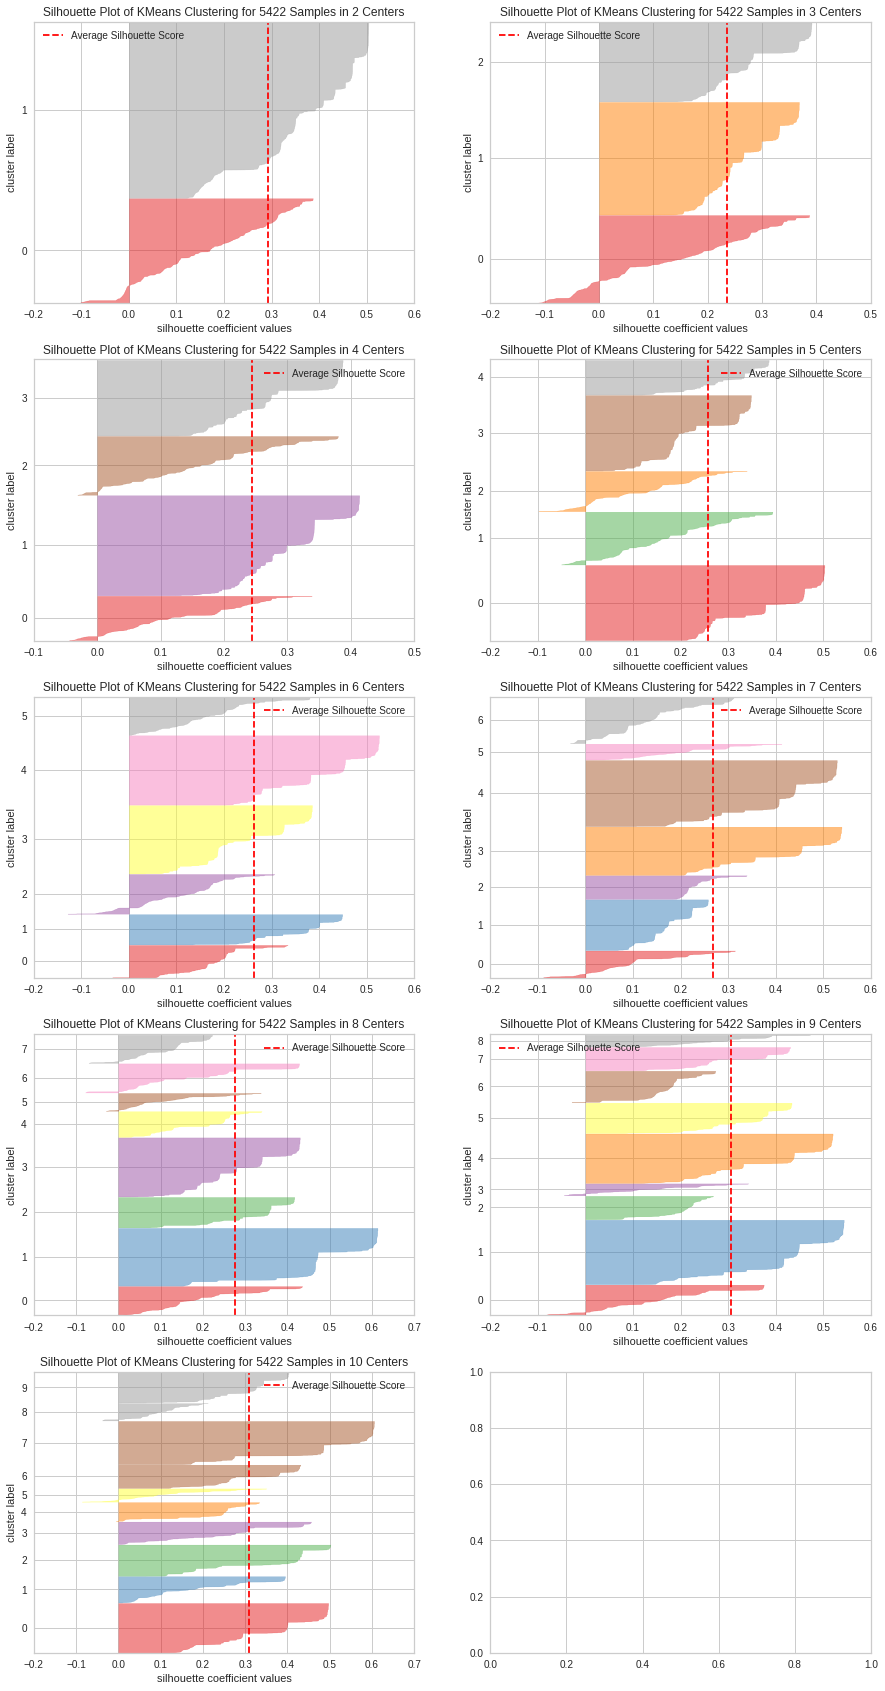

In [172]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cust)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

From the result of elbow & silhouette method, we can determine the **best number of cluster for this data is 2**.

### Fit in the cluster results back to the dataset

In [173]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   user_id                           5422 non-null   object        
 1   user_gender                       5422 non-null   object        
 2   user_age                          5422 non-null   int64         
 3   user_occupation                   5422 non-null   object        
 4   user_income_range                 5422 non-null   category      
 5   referral_code_used                5422 non-null   object        
 6   date                              5422 non-null   datetime64[ns]
 7   Saham_Total_Trx                   5422 non-null   int64         
 8   Saham_Total_Count                 5422 non-null   int64         
 9   PasarUang_Total_Trx               5422 non-null   int64         
 10  PasarUang_Total_Count             5422 non-null 

In [174]:
# Make the base user dataframe
base_cust = df_cluster[['user_id','user_age','age_group','user_occupation','user_income_range','referral_code_used',
                        'Saham_Total_Trx','Saham_Total_Count','PasarUang_Total_Trx','PasarUang_Total_Count',
                        'FixedInc_Total_Trx','FixedInc_Total_Count','Campuran_Total_Trx','Mixed_Total_Count']]
base_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5422 entries, 0 to 5421
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   user_id                5422 non-null   object  
 1   user_age               5422 non-null   int64   
 2   age_group              4751 non-null   category
 3   user_occupation        5422 non-null   object  
 4   user_income_range      5422 non-null   category
 5   referral_code_used     5422 non-null   object  
 6   Saham_Total_Trx        5422 non-null   int64   
 7   Saham_Total_Count      5422 non-null   int64   
 8   PasarUang_Total_Trx    5422 non-null   int64   
 9   PasarUang_Total_Count  5422 non-null   int64   
 10  FixedInc_Total_Trx     5422 non-null   int64   
 11  FixedInc_Total_Count   5422 non-null   int64   
 12  Campuran_Total_Trx     5422 non-null   int64   
 13  Mixed_Total_Count      5422 non-null   float64 
dtypes: category(2), float64(1), int64(8), ob

In [175]:
cluster_model = cluster.KMeans(n_clusters=2)
cluster_model.fit(df_cust)
cluster_label = cluster_model.labels_
base_cust['cluster'] = cluster_label
base_cust

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user_id,user_age,age_group,user_occupation,user_income_range,referral_code_used,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,PasarUang_Total_Count,FixedInc_Total_Trx,FixedInc_Total_Count,Campuran_Total_Trx,Mixed_Total_Count,cluster
0,3816789,53,41-50,IRT,> Rp 50 Juta - 100 Juta,did not use,100000,1,0,0,0,0,0,0.0,0
1,3802293,47,31-40 years,Others,> Rp 100 Juta,used referral,0,0,0,0,2030000,2,0,0.0,0
2,3049927,53,41-50,Swasta,< 10 Juta,did not use,0,0,0,0,0,0,149000,1.0,0
3,3836491,59,41-50,Others,< 10 Juta,used referral,0,0,0,0,0,0,0,0.0,0
4,3718933,50,41-50,Pengusaha,> Rp 100 Juta,did not use,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4074036,49,31-40 years,Swasta,> Rp 100 Juta,did not use,0,0,0,0,0,0,0,0.0,0
5418,3973310,49,31-40 years,Others,> Rp 100 Juta,used referral,0,0,0,0,0,0,0,0.0,0
5419,4072318,49,31-40 years,Swasta,> Rp 100 Juta,did not use,0,0,0,0,0,0,0,0.0,0
5420,3965617,49,31-40 years,IRT,> Rp 100 Juta,did not use,0,0,100000,1,340000,1,0,0.0,0


In [176]:
base_cust.groupby('cluster')['user_id'].agg(['count'])

,count
cluster,
0,2025
1,3397


In [177]:
base_cust.groupby(['cluster'])['user_occupation'].describe()

,count,unique,top,freq
cluster,,,,
0,2025,5,Swasta,931
1,3397,5,Pelajar,2484


In [178]:
base_cust.groupby(['cluster'])['user_income_range'].describe()

,count,unique,top,freq
cluster,,,,
0,2025,4,> Rp 50 Juta - 100 Juta,899
1,3397,3,< 10 Juta,2207


In [179]:
base_cust.groupby(['cluster'])['age_group'].describe()

,count,unique,top,freq
cluster,,,,
0,2023,5,20-30 years,905
1,2728,2,Under 20s,2538


In [180]:
base_cust.groupby(['cluster'])['referral_code_used'].describe()

,count,unique,top,freq
cluster,,,,
0,2025,2,did not use,1471
1,3397,2,did not use,2376


In [181]:
base_cust.groupby(['cluster'])['Saham_Total_Trx','Saham_Total_Count'].agg(['mean','min','max','count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Saham_Total_Trx                         Saham_Total_Count          \
                   mean      min      max count              mean min max   
cluster                                                                     
0          18792.915062 -2777606  1000000  2025          0.357531   0   8   
1          11796.817780 -3550000   570000  3397          0.304092   0   6   

               
        count  
cluster        
0        2025  
1        3397

In [182]:
base_cust.groupby(['cluster'])['PasarUang_Total_Trx','PasarUang_Total_Count'].agg(['mean','min','max','count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


PasarUang_Total_Trx                         PasarUang_Total_Count      \
                       mean      min      max count                  mean min   
cluster                                                                         
0              31427.474074 -2300000  6300000  2025              0.412346   0   
1              20302.230792 -1874000  4000000  3397              0.376509   0   

                   
        max count  
cluster            
0         9  2025  
1         8  3397

In [183]:
base_cust.groupby(['cluster'])['FixedInc_Total_Trx','FixedInc_Total_Count'].agg(['mean','min','max','count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


FixedInc_Total_Trx                          FixedInc_Total_Count      \
                      mean      min       max count                 mean min   
cluster                                                                        
0             36014.539259 -4703835  10000000  2025             0.329877   0   
1             19634.962025 -3675000  13420000  3397             0.275243   0   

                   
        max count  
cluster            
0         9  2025  
1        10  3397

In [184]:
base_cust.groupby(['cluster'])['Campuran_Total_Trx','Mixed_Total_Count'].agg(['mean','min','max','count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Campuran_Total_Trx                         Mixed_Total_Count       \
                      mean     min       max count              mean  min   
cluster                                                                     
0             41635.922469 -593257  13000000  2025          0.021728  0.0   
1             10335.914631 -500000  13951102  3397          0.006182  0.0   

                    
         max count  
cluster             
0        4.0  2025  
1        2.0  3397

In [185]:
clust_1 = base_cust[base_cust['cluster']==0].copy()
clust_1

,user_id,user_age,age_group,user_occupation,user_income_range,referral_code_used,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,PasarUang_Total_Count,FixedInc_Total_Trx,FixedInc_Total_Count,Campuran_Total_Trx,Mixed_Total_Count,cluster
0,3816789,53,41-50,IRT,> Rp 50 Juta - 100 Juta,did not use,100000,1,0,0,0,0,0,0.0,0
1,3802293,47,31-40 years,Others,> Rp 100 Juta,used referral,0,0,0,0,2030000,2,0,0.0,0
2,3049927,53,41-50,Swasta,< 10 Juta,did not use,0,0,0,0,0,0,149000,1.0,0
3,3836491,59,41-50,Others,< 10 Juta,used referral,0,0,0,0,0,0,0,0.0,0
4,3718933,50,41-50,Pengusaha,> Rp 100 Juta,did not use,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,4074036,49,31-40 years,Swasta,> Rp 100 Juta,did not use,0,0,0,0,0,0,0,0.0,0
5418,3973310,49,31-40 years,Others,> Rp 100 Juta,used referral,0,0,0,0,0,0,0,0.0,0
5419,4072318,49,31-40 years,Swasta,> Rp 100 Juta,did not use,0,0,0,0,0,0,0,0.0,0
5420,3965617,49,31-40 years,IRT,> Rp 100 Juta,did not use,0,0,100000,1,340000,1,0,0.0,0


In [186]:
clust_1['user_occupation'].value_counts()

Swasta       931
Pelajar      436
Others       327
IRT          185
Pengusaha    146
Name: user_occupation, dtype: int64

In [187]:
clust_1['age_group'].value_counts()

20-30 years    905
Under 20s      564
31-40 years    416
41-50          128
Above 50s       10
Name: age_group, dtype: int64

In [188]:
clust_1['user_income_range'].value_counts()

> Rp 50 Juta - 100 Juta    899
Rp 10 Juta - 50 Juta       565
> Rp 100 Juta              456
< 10 Juta                  105
Name: user_income_range, dtype: int64

In [189]:
clust_2 = base_cust[base_cust['cluster']==1].copy()
clust_2

,user_id,user_age,age_group,user_occupation,user_income_range,referral_code_used,Saham_Total_Trx,Saham_Total_Count,PasarUang_Total_Trx,PasarUang_Total_Count,FixedInc_Total_Trx,FixedInc_Total_Count,Campuran_Total_Trx,Mixed_Total_Count,cluster
166,2431071,17,NaN,Pelajar,Rp 10 Juta - 50 Juta,did not use,0,0,0,0,0,0,0,0.0,1
167,2182692,17,NaN,Pelajar,< 10 Juta,used referral,0,0,0,0,25000,1,0,0.0,1
168,3426536,17,NaN,Pelajar,< 10 Juta,did not use,0,0,0,0,0,0,0,0.0,1
169,336770,17,NaN,Pelajar,Rp 10 Juta - 50 Juta,did not use,0,0,0,0,504590,2,0,0.0,1
170,3750521,17,NaN,Pelajar,< 10 Juta,did not use,0,0,0,0,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,4117846,39,20-30 years,Others,< 10 Juta,used referral,0,0,0,0,0,0,0,0.0,1
5013,4104237,39,20-30 years,Swasta,< 10 Juta,used referral,0,0,10000,1,0,0,0,0.0,1
5014,3969827,39,20-30 years,IRT,< 10 Juta,used referral,0,0,0,0,0,0,0,0.0,1
5015,4082120,39,20-30 years,IRT,< 10 Juta,did not use,100000,1,0,0,0,0,0,0.0,1


In [190]:
clust_2['user_occupation'].value_counts()

Pelajar      2484
Swasta        375
Others        355
IRT           114
Pengusaha      69
Name: user_occupation, dtype: int64

In [191]:
clust_2['age_group'].value_counts()

Under 20s      2538
20-30 years     190
31-40 years       0
41-50             0
Above 50s         0
Name: age_group, dtype: int64

In [192]:
clust_2['user_income_range'].value_counts()

< 10 Juta                  2207
Rp 10 Juta - 50 Juta       1178
> Rp 50 Juta - 100 Juta      12
> Rp 100 Juta                 0
Name: user_income_range, dtype: int64

**Customer Personas**

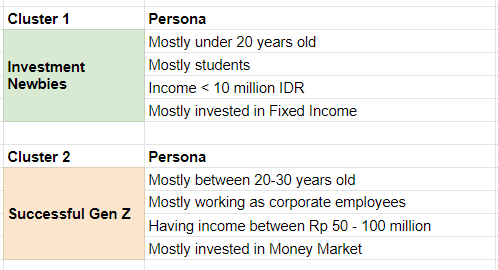

Recommendations for targeting Succesful Gen Z:
* Because most of them already invested in bonds instrument mutual funds, we can promote & socialize characteristics of government bonds and what are the differences between bonds and government bonds (via social media or emails)
* We can promote more discounts or cashback if they share referral codes of new product to their friends & family
* Give extra % return or cashback to existing users if they invested in the new product

Recommendations for targeting Investment Newbies:
* Because most of them are students & new in investments, we can arrange an investment class for existing users to socialize investment risks & types
* Extra vouchers or cashback that could only be redeemed if they attended the investment class & share about the class in social media
* Promote & socialize about investing and about the new product via social media, hold giveaway events. 
